# **Task 26-> Classification Algorithms using scikit-learn**


## **Logistic Regression in `sklearn.linear_model`**

### **Overview**
`LogisticRegression` is a classifier for binary or multiclass problems. It supports regularization and various solvers.

### **Key Parameters**
- **penalty** (`{'l1', 'l2', 'elasticnet', None}`): Norm of the penalty. Default is `'l2'`.
- **dual** (`bool`): Dual or primal formulation. Default is `False`.
- **tol** (`float`): Tolerance for stopping criteria. Default is `1e-4`.
- **C** (`float`): Inverse of regularization strength. Default is `1.0`.
- **fit_intercept** (`bool`): Specifies if a constant should be added to the decision function. Default is `True`.
- **intercept_scaling** (`float`): Scaling of the intercept term. Used only when `solver='liblinear'`. Default is `1`.
- **class_weight** (`dict` or `'balanced'`): Weights associated with classes. Default is `None`.
- **random_state** (`int`): Seed for random number generation. Default is `None`.
- **solver** (`{'lbfgs', 'liblinear', 'newton-cg', 'newton-cholesky', 'sag', 'saga'}`): Algorithm to use in the optimization problem. Default is `'lbfgs'`.
- **max_iter** (`int`): Maximum number of iterations for the solvers to converge. Default is `100`.
- **multi_class** (`{'auto', 'ovr', 'multinomial'}`): Strategy for multiclass problems. Default is `'auto'`.
- **verbose** (`int`): For verbosity. Default is `0`.
- **warm_start** (`bool`): Reuse the solution of the previous call to fit as initialization. Default is `False`.
- **n_jobs** (`int`): Number of CPU cores used when parallelizing over classes if `multi_class='ovr'`. Default is `None`.
- **l1_ratio** (`float`): The Elastic-Net mixing parameter. Default is `None`.

### **Attributes**
- **classes_** (`ndarray`): A list of class labels known to the classifier.
- **coef_** (`ndarray`): Coefficient of the features in the decision function.
- **intercept_** (`ndarray`): Intercept (bias) added to the decision function.
- **n_features_in_** (`int`): Number of features seen during fit.
- **feature_names_in_** (`ndarray`): Names of features seen during fit.
- **n_iter_** (`ndarray`): Actual number of iterations for all classes.

### **Solvers and Penalties**
- **'lbfgs'**: Supports `l2` and no penalty.
- **'liblinear'**: Supports `l1` and `l2`. No multinomial support.
- **'newton-cg'**: Supports `l2` and no penalty.
- **'newton-cholesky'**: Supports `l2` and no penalty.
- **'sag'**: Supports `l2` and no penalty.
- **'saga'**: Supports `elasticnet`, `l1`, `l2`, and no penalty.

### **References**
- [LIBLINEAR](https://www.csie.ntu.edu.tw/~cjlin/liblinear/)
- [L-BFGS-B](http://users.iems.northwestern.edu/~nocedal/lbfgsb.html)
- [SAG - Stochastic Average Gradient](https://hal.inria.fr/hal-00860051/document)
- [SAGA - A Fast Incremental Gradient Method](https://hal.archives-ouvertes.fr/hal-01059696/document)


Dataset Preview:
   sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                5.1               3.5                1.4               0.2   
1                4.9               3.0                1.4               0.2   
2                4.7               3.2                1.3               0.2   
3                4.6               3.1                1.5               0.2   
4                5.0               3.6                1.4               0.2   

   species  
0        0  
1        0  
2        0  
3        0  
4        0  
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       1.00      0.85      0.92        13
   virginica       0.87      1.00      0.93        13

    accuracy                           0.96        45
   macro avg       0.96      0.95      0.95        45
weighted avg       0.96      0.96      0.96        45

Confusion Matrix:


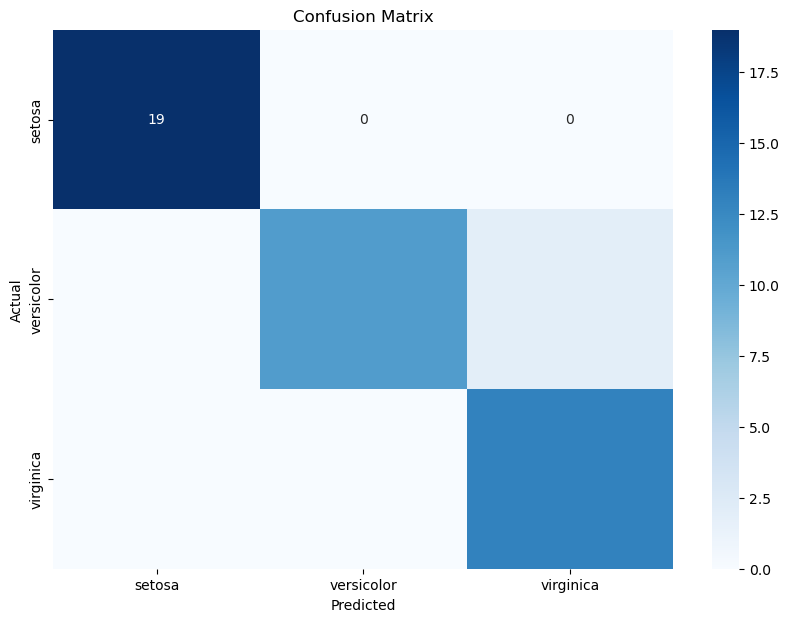

Accuracy Score: 0.96


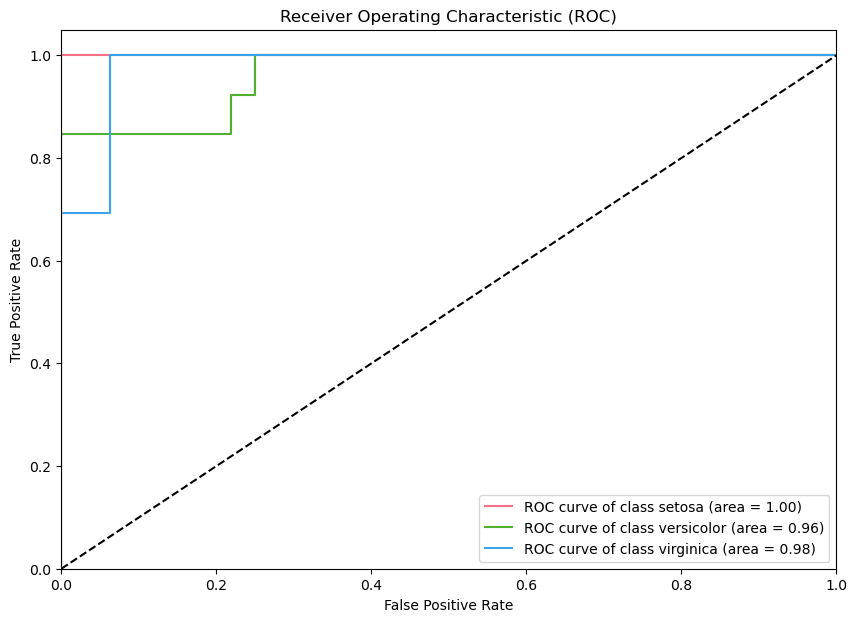

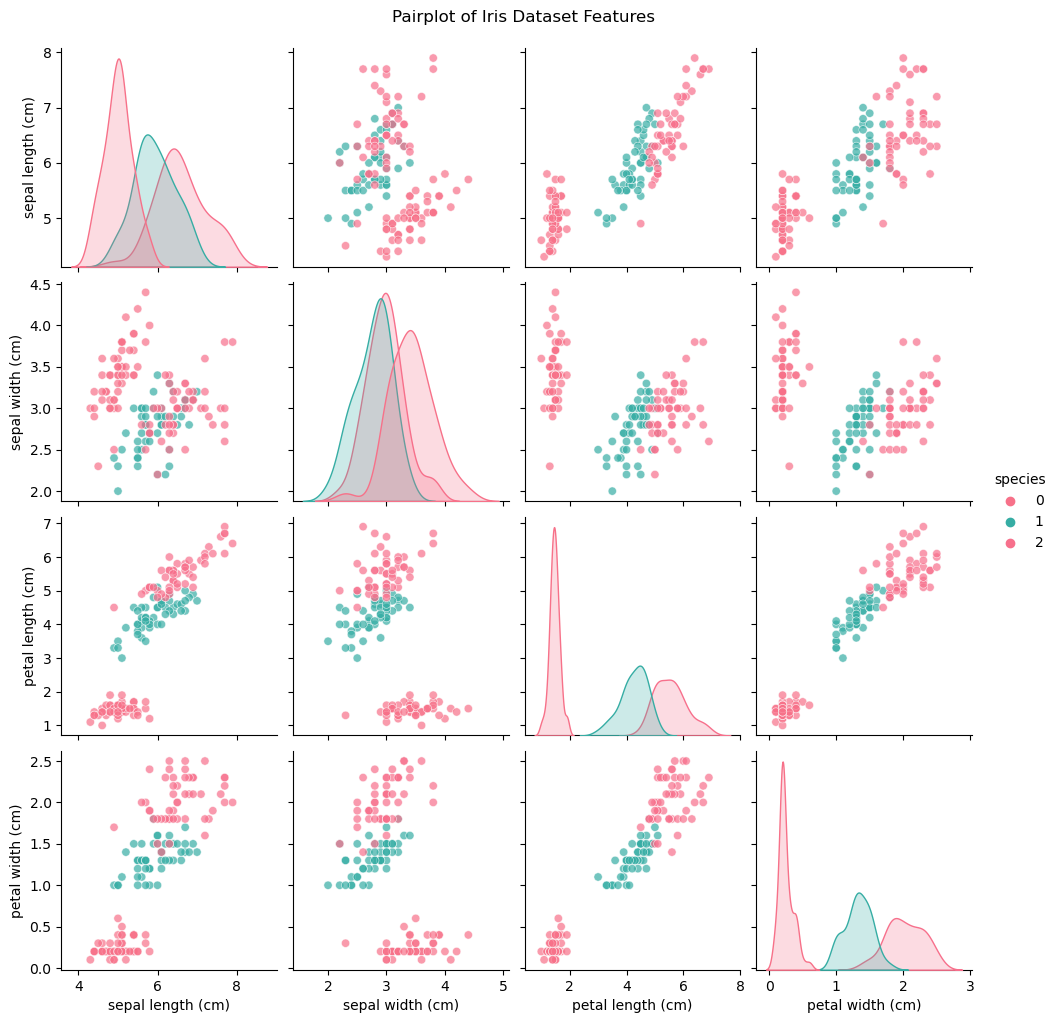

Model Coefficients:
[[-0.76103366  1.06829765 -1.91515163 -1.62529456]
 [ 0.09103129 -1.47089117  0.51999385 -0.60151567]
 [ 0.         -0.45561603  2.68690487  3.11484191]]
Model Intercept:
[-2.38798727 -0.2748482  -3.00014567]
Number of Features Seen During Fit:
4
Feature Names Seen During Fit:
Feature names not available for this model
Number of Iterations:
[53 51 62]


In [46]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.preprocessing import StandardScaler, label_binarize
import joblib


joblib.parallel_backend('threading')

iris = load_iris()
X = iris.data
y = iris.target
feature_names = iris.feature_names
target_names = iris.target_names

df = pd.DataFrame(X, columns=feature_names)
df['species'] = y

print("Dataset Preview:")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = LogisticRegression(
    penalty='elasticnet',
    dual=False,
    tol=1e-4,
    C=1.0,
    fit_intercept=True,
    intercept_scaling=1,
    class_weight='balanced',
    random_state=42,
    solver='saga',
    max_iter=200,
    multi_class='ovr',
    verbose=0,
    warm_start=False,
    n_jobs=-1,
    l1_ratio=0.5
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)
y_prob = model.predict_proba(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(10, 7))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

plt.figure(figsize=(10, 7))
for i, color in zip(range(len(target_names)), sns.color_palette("husl", len(target_names))):
    fpr, tpr, _ = roc_curve(y_test == i, y_prob[:, i])
    plt.plot(fpr, tpr, color=color, label=f'ROC curve of class {target_names[i]} (area = {auc(fpr, tpr):.2f})')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc='lower right')
plt.show()

sns.pairplot(df, hue='species', palette='husl', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Iris Dataset Features', y=1.02)
plt.show()

print("Model Coefficients:")
print(model.coef_)
print("Model Intercept:")
print(model.intercept_)

print("Number of Features Seen During Fit:")
print(model.n_features_in_)
print("Feature Names Seen During Fit:")
print(getattr(model, 'feature_names_in_', 'Feature names not available for this model'))
print("Number of Iterations:")
print(model.n_iter_)


## **KNeighborsClassifier**

The `KNeighborsClassifier` is a classification algorithm that implements the k-nearest neighbors vote. It is used to classify a data point based on the majority class of its k nearest neighbors.

### **Parameters**

- **n_neighbors**: `int`, default=5
  - Number of neighbors to use by default for kneighbors queries.
- **weights**: `{'uniform', 'distance'}`, callable or `None`, default='uniform'
  - Weight function used in prediction. Possible values:
    - `'uniform'`: All points in each neighborhood are weighted equally.
    - `'distance'`: Weight points by the inverse of their distance.
    - `[callable]`: A user-defined function which returns an array of weights.
- **algorithm**: `{'auto', 'ball_tree', 'kd_tree', 'brute'}`, default='auto'
  - Algorithm used to compute the nearest neighbors:
    - `'ball_tree'`: Will use BallTree.
    - `'kd_tree'`: Will use KDTree.
    - `'brute'`: Will use a brute-force search.
    - `'auto'`: Will attempt to decide the most appropriate algorithm.
- **leaf_size**: `int`, default=30
  - Leaf size passed to BallTree or KDTree. Affects speed of construction and query.
- **p**: `float`, default=2
  - Power parameter for the Minkowski metric. When `p=1`, equivalent to using Manhattan distance. When `p=2`, equivalent to Euclidean distance.
- **metric**: `str` or callable, default='minkowski'
  - Metric to use for distance computation. Default is "minkowski".
- **n_jobs**: `int`, default=None
  - Number of parallel jobs to run for neighbors search. `None` means 1. `-1` means using all processors.

### **Attributes**

- **classes_**: Array of shape `(n_classes,)`
  - Class labels known to the classifier.
- **effective_metric_**: `str` or callable
  - The distance metric used.
- **n_features_in_**: `int`
  - Number of features seen during fit.
- **n_samples_fit_**: `int`
  - Number of samples in the fitted data.


Dataset Preview:
   alcohol  malic_acid   ash  alcalinity_of_ash  magnesium  total_phenols  \
0    14.23        1.71  2.43               15.6      127.0           2.80   
1    13.20        1.78  2.14               11.2      100.0           2.65   
2    13.16        2.36  2.67               18.6      101.0           2.80   
3    14.37        1.95  2.50               16.8      113.0           3.85   
4    13.24        2.59  2.87               21.0      118.0           2.80   

   flavanoids  nonflavanoid_phenols  proanthocyanins  color_intensity   hue  \
0        3.06                  0.28             2.29             5.64  1.04   
1        2.76                  0.26             1.28             4.38  1.05   
2        3.24                  0.30             2.81             5.68  1.03   
3        3.49                  0.24             2.18             7.80  0.86   
4        2.69                  0.39             1.82             4.32  1.04   

   od280/od315_of_diluted_wines  proline  tar

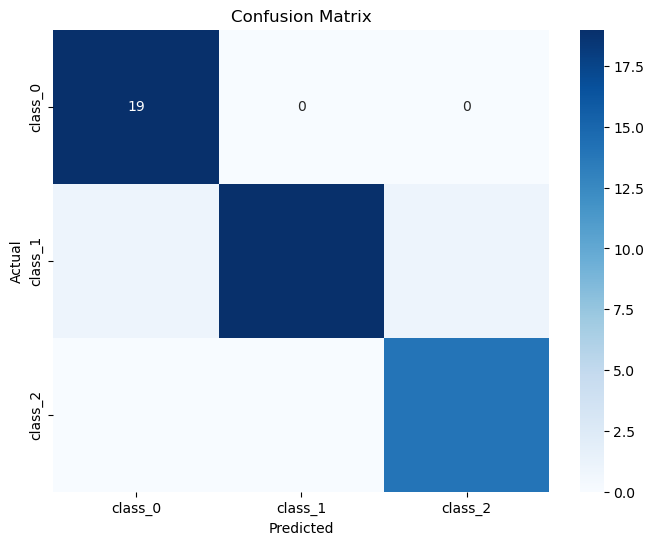

Accuracy Score: 0.96


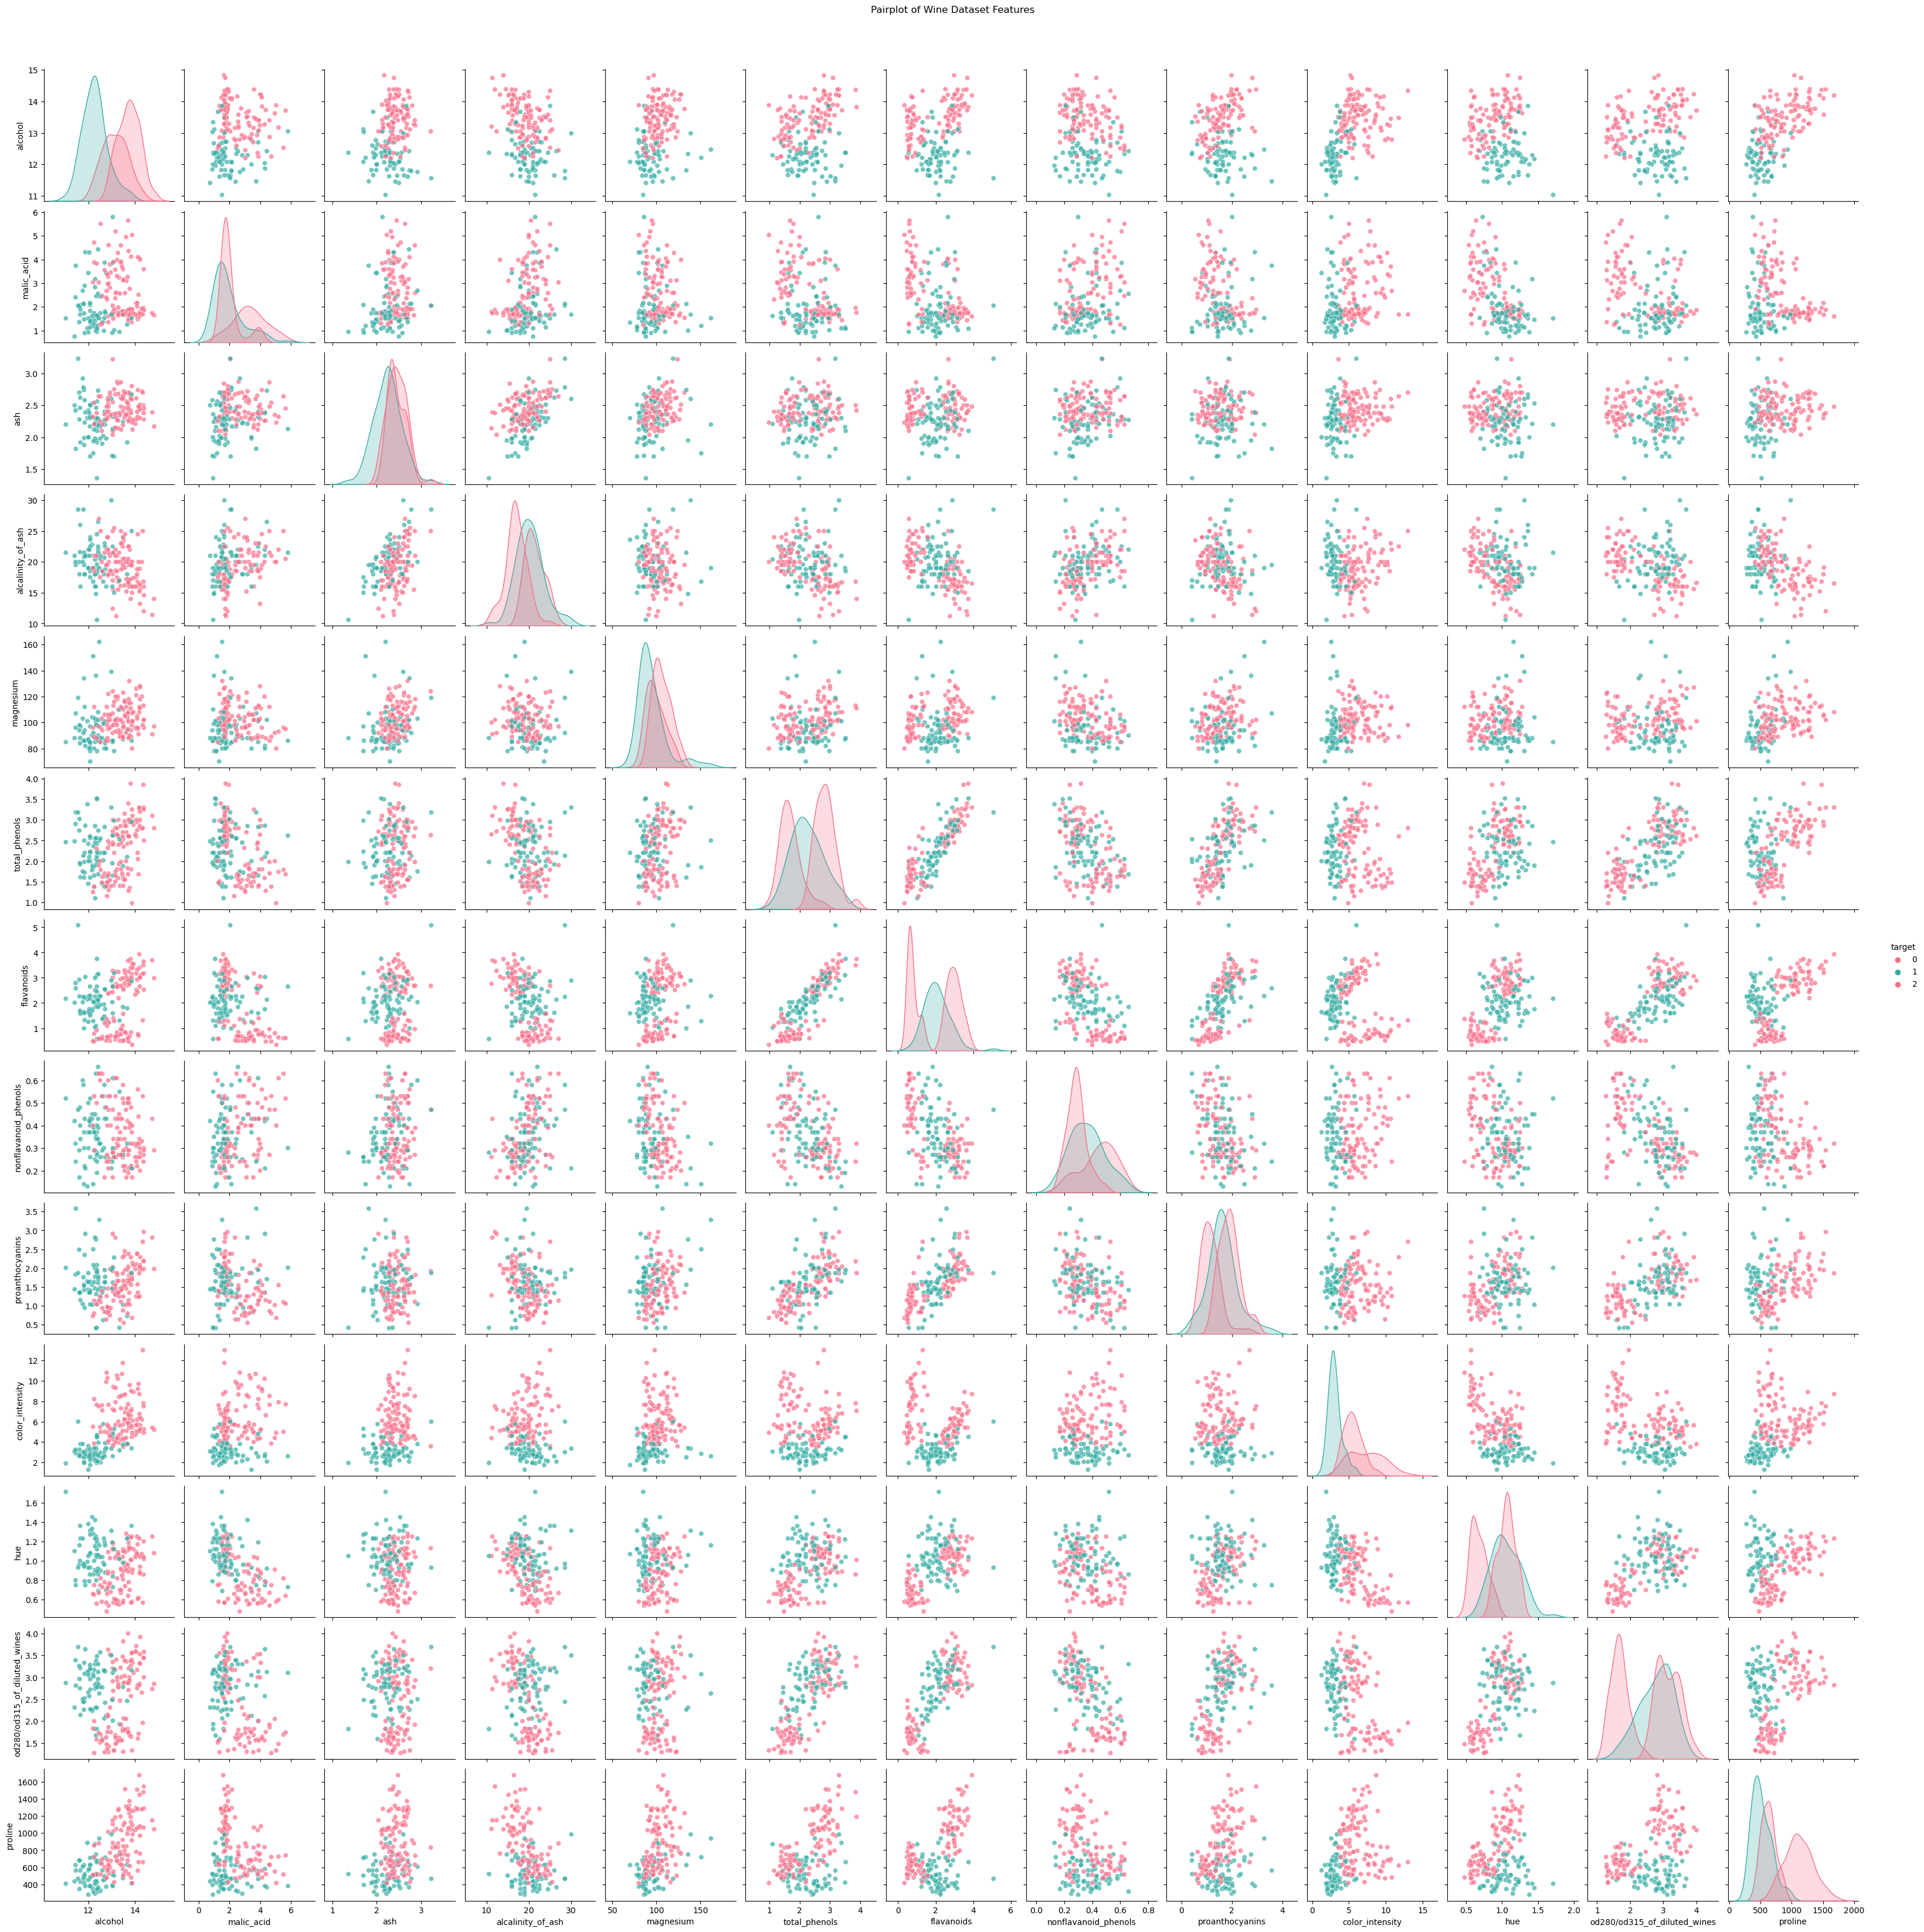

Model Attributes:
Class Labels Known to the Classifier:
[0 1 2]
Effective Metric Used:
euclidean
Number of Features Seen During Fit:
13
Number of Samples in the Fitted Data:
124


In [47]:
import warnings
warnings.filterwarnings('ignore')

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler

wine = load_wine()
X = wine.data
y = wine.target
feature_names = wine.feature_names
target_names = wine.target_names

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset Preview:")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model = KNeighborsClassifier(
    n_neighbors=5,                  
    weights='distance',             
    algorithm='ball_tree',          
    leaf_size=40,                   
    p=1,                            
    metric='euclidean',             
    n_jobs=-1                        
)

model.fit(X_train_scaled, y_train)

y_pred = model.predict(X_test_scaled)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy Score: {accuracy:.2f}")

sns.pairplot(df, hue='target', palette='husl', diag_kind='kde', plot_kws={'alpha': 0.7})
plt.suptitle('Pairplot of Wine Dataset Features', y=1.02)
plt.show()

def plot_decision_boundaries(X, y, model, title):
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02),
                         np.arange(y_min, y_max, 0.02))
    # Predict using the model trained on all features
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(10, 6))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap='coolwarm')
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap='coolwarm')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.title(title)
    plt.show()

X_train_reduced = X_train_scaled[:, :2]
X_test_reduced = X_test_scaled[:, :2]

model_reduced = KNeighborsClassifier(
    n_neighbors=5,
    weights='distance',
    algorithm='ball_tree',
    leaf_size=40,
    p=1,
    metric='euclidean',
    n_jobs=-1
)
model_reduced.fit(X_train_reduced, y_train)

plot_decision_boundaries(X_train_reduced, y_train, model_reduced, 'Decision Boundaries for KNN Classifier (First Two Features)')

print("Model Attributes:")
print("Class Labels Known to the Classifier:")
print(model.classes_)
print("Effective Metric Used:")
print(model.effective_metric_)
print("Number of Features Seen During Fit:")
print(model.n_features_in_)
print("Number of Samples in the Fitted Data:")
print(model.n_samples_fit_)


## **Support Vector Machines (SVMs) - Parameters and Attributes**

### **`SVC` (Support Vector Classification)**

#### **Parameters**

- **`C`**: Regularization parameter. The strength of the regularization is inversely proportional to `C`. Must be strictly positive.
- **`kernel`**: Specifies the kernel type to be used in the algorithm. Common values are `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, and a callable function for custom kernels.
- **`degree`**: Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.
- **`gamma`**: Kernel coefficient for `'rbf'`, `'poly'`, and `'sigmoid'`. If `gamma` is `scale`, it is set to `1 / (n_features * X.var())`.
- **`coef0`**: Independent term in kernel function. It is only significant in `'poly'` and `'sigmoid'`.
- **`probability`**: Whether to enable probability estimates. This must be enabled prior to calling `fit`. It is recommended to leave this parameter as `False` if probability estimates are not required.
- **`shrinking`**: Whether to use the shrinking heuristic.
- **`class_weight`**: Set the parameter to `balanced` to automatically adjust weights inversely proportional to class frequencies.
- **`max_iter`**: Hard limit on iterations within solver, or -1 for no limit.

#### **Attributes**

- **`support_vectors_`**: Array of shape `(n_support_vectors, n_features)` containing support vectors.
- **`support_`**: Indices of support vectors.
- **`n_support_`**: Number of support vectors for each class.
- **`dual_coef_`**: Coefficients of the support vector in the decision function.
- **`coef_`**: Coefficients of the decision function if `kernel='linear'`.
- **`intercept_`**: Constant in decision function.

### **`NuSVC` (Nu Support Vector Classification)**

#### **Parameters**

- **`nu`**: An upper bound on the fraction of margin errors and a lower bound of the fraction of support vectors. Must be in `(0, 1]`.
- **`kernel`**: Specifies the kernel type to be used in the algorithm. Common values are `'linear'`, `'poly'`, `'rbf'`, `'sigmoid'`, and a callable function for custom kernels.
- **`degree`**: Degree of the polynomial kernel function (`'poly'`). Ignored by all other kernels.
- **`gamma`**: Kernel coefficient for `'rbf'`, `'poly'`, and `'sigmoid'`. If `gamma` is `scale`, it is set to `1 / (n_features * X.var())`.
- **`coef0`**: Independent term in kernel function. It is only significant in `'poly'` and `'sigmoid'`.
- **`shrinking`**: Whether to use the shrinking heuristic.
- **`class_weight`**: Set the parameter to `balanced` to automatically adjust weights inversely proportional to class frequencies.
- **`probability`**: Whether to enable probability estimates. This must be enabled prior to calling `fit`.

#### **Attributes**

- **`support_vectors_`**: Array of shape `(n_support_vectors, n_features)` containing support vectors.
- **`support_`**: Indices of support vectors.
- **`n_support_`**: Number of support vectors for each class.
- **`dual_coef_`**: Coefficients of the support vector in the decision function.
- **`intercept_`**: Constant in decision function.

### **`LinearSVC` (Linear Support Vector Classification)**

#### **Parameters**

- **`C`**: Regularization parameter. The strength of the regularization is inversely proportional to `C`. Must be strictly positive.
- **`penalty`**: Used to specify the norm used in the penalization. Options are `'l1'` and `'l2'`.
- **`loss`**: Specifies the loss function. Options are `'squared_hinge'` and `'hinge'`.
- **`dual`**: Whether to use the dual or primal formulation. Prefer dual=False when `n_samples > n_features`.
- **`class_weight`**: Set the parameter to `balanced` to automatically adjust weights inversely proportional to class frequencies.
- **`max_iter`**: Hard limit on iterations within solver, or -1 for no limit.

#### **Attributes**

- **`coef_`**: Coefficients of the decision function.
- **`intercept_`**: Constant in decision function.
- **`n_iter_`**: Number of iterations run by the solver.

### **Kernel Parameters**

- **Linear Kernel (`kernel='linear'`)**:
  - No additional parameters.

- **Polynomial Kernel (`kernel='poly'`)**:
  - **`degree`**: Degree of the polynomial kernel function.
  - **`coef0`**: Independent term in kernel function.

- **RBF Kernel (`kernel='rbf'`)**:
  - **`gamma`**: Kernel coefficient.

- **Sigmoid Kernel (`kernel='sigmoid'`)**:
  - **`coef0`**: Independent term in kernel function.
  - **`gamma`**: Kernel coefficient.

- **Custom Kernels**:
  - Implemented as a callable function, which should take two arrays and return the kernel matrix.



Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        19
  versicolor       0.54      0.54      0.54        13
   virginica       0.54      0.54      0.54        13

    accuracy                           0.73        45
   macro avg       0.69      0.69      0.69        45
weighted avg       0.73      0.73      0.73        45

Confusion Matrix:
[[19  0  0]
 [ 0  7  6]
 [ 0  6  7]]
Support Vectors:
[[-1.02184904 -0.13197948]
 [-0.41600969  2.63038172]
 [-1.14301691  0.09821729]
 [-1.74885626 -0.36217625]
 [-1.62768839 -1.74335684]
 [-1.14301691 -0.13197948]
 [-0.53717756  0.78880759]
 [-0.05250608  2.16998818]
 [ 0.91683689 -0.13197948]
 [-0.17367395 -0.36217625]
 [-0.29484182 -0.13197948]
 [-0.05250608 -0.82256978]
 [-1.02184904 -2.43394714]
 [-0.17367395 -0.13197948]
 [ 0.4321654  -0.36217625]
 [ 0.18982966 -1.97355361]
 [-0.53717756 -0.13197948]
 [-1.02184904 -1.74335684]
 [ 1.03800476 -0.13197948]
 [ 0.068661

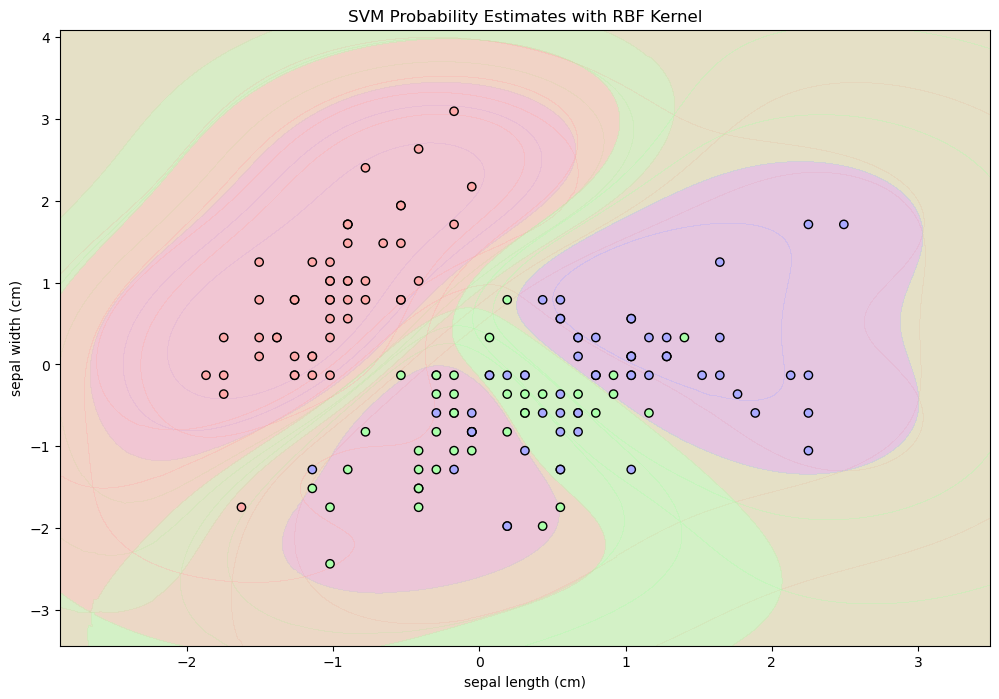

In [48]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix
from matplotlib.colors import ListedColormap
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import learning_curve

data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
target_names = data.target_names

scaler = StandardScaler()
X = scaler.fit_transform(X)

X_reduced = X[:, :2]
feature_names_reduced = feature_names[:2]

X_train, X_test, y_train, y_test = train_test_split(X_reduced, y, test_size=0.3, random_state=42)

model = SVC(
    C=1.0,
    kernel='rbf',
    gamma='scale',
    probability=True,
    class_weight='balanced'
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

print("Support Vectors:")
print(model.support_vectors_)

print("Support Vector Indices:")
print(model.support_)

print("Number of Support Vectors for Each Class:")
print(model.n_support_)

print("Dual Coefficients:")
print(model.dual_coef_)

print("Coefficients of the Decision Function (Linear Kernel Only):")
print(getattr(model, 'coef_', 'Linear Kernel Not Used'))

print("Intercept:")
print(model.intercept_)

print("Number of Features Seen During Fit:")
print(model.n_features_in_)

def plot_decision_boundaries(X, y, model, title):
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    h = .02  # step size in the mesh

    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

   
    plt.figure(figsize=(12, 8))
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=cmap)
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap)
    plt.scatter(model.support_vectors_[:, 0], model.support_vectors_[:, 1], s=100, facecolors='none', edgecolors='k', marker='o', label='Support Vectors')
    plt.title(title)
    plt.xlabel(feature_names_reduced[0])
    plt.ylabel(feature_names_reduced[1])
    plt.legend()
    plt.show()

plot_decision_boundaries(X_reduced, y, model, 'SVM Decision Boundary with RBF Kernel and Support Vectors')

def plot_probability_estimates(X, y, model, title):
    cmap = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    h = .02  # step size in the mesh

    
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))

    Z = model.predict_proba(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape + (-1,))

    plt.figure(figsize=(12, 8))
    for i in range(Z.shape[2]):
        plt.contourf(xx, yy, Z[:, :, i], alpha=0.3, cmap=cmap, levels=np.linspace(0, 1, 10))
    plt.scatter(X[:, 0], X[:, 1], c=y, edgecolor='k', cmap=cmap)
    plt.title(title)
    plt.xlabel(feature_names_reduced[0])
    plt.ylabel(feature_names_reduced[1])
    plt.show()

plot_probability_estimates(X_reduced, y, model, 'SVM Probability Estimates with RBF Kernel')

def plot_learning_curves(X, y, model):
    train_sizes, train_scores, test_scores = learning_curve(model, X, y, cv=5, n_jobs=-1,
                                                            train_sizes=np.linspace(0.1, 1.0, 10),
                                                            scoring='accuracy')
    
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation Score', color='red')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curves(X_reduced, y, model)


# **Decision Trees in Scikit-Learn**

Decision Trees (DTs) are a versatile supervised learning method used for both classification and regression tasks. They work by creating a model that predicts the value of a target variable by learning simple decision rules inferred from the data features. Here’s a detailed overview of the parameters, attributes, and mathematical formulations associated with Decision Trees in Scikit-Learn.


## **Classification**

### **`DecisionTreeClassifier` Parameters:**
- **`criterion`**: Function to measure the quality of a split. Options:
  - `"gini"` (default)
  - `"entropy"`
- **`splitter`**: Strategy used to choose the split at each node. Options:
  - `"best"` (default)
  - `"random"`
- **`max_depth`**: The maximum depth of the tree. Default is `None`.
- **`min_samples_split`**: The minimum number of samples required to split an internal node. Default is `2`.
- **`min_samples_leaf`**: The minimum number of samples required to be at a leaf node. Default is `1`.
- **`min_weight_fraction_leaf`**: The minimum weighted fraction of the sum total of weights required to be at a leaf node. Default is `0.0`.
- **`max_features`**: The number of features to consider when looking for the best split. Options:
  - `None` (default): All features
  - `int`: Number of features
  - `float`: Fraction of features
  - `"auto"`: `sqrt(n_features)`
  - `"sqrt"`: `sqrt(n_features)`
  - `"log2"`: `log2(n_features)`
- **`class_weight`**: Weights associated with classes. Default is `None`.
- **`random_state`**: Controls the randomness of the estimator. Default is `None`.
- **`max_leaf_nodes`**: Grow a tree with `max_leaf_nodes` in the best-first fashion. Default is `None`.
- **`min_impurity_decrease`**: A node will be split if this split induces a decrease of the impurity greater than or equal to this value. Default is `0.0`.
- **`presort`**: Deprecated. Default is `None`.



Dataset Overview:
   pixel0  pixel1  pixel2  pixel3  pixel4  pixel5  pixel6  pixel7  pixel8  \
0     0.0     0.0     5.0    13.0     9.0     1.0     0.0     0.0     0.0   
1     0.0     0.0     0.0    12.0    13.0     5.0     0.0     0.0     0.0   
2     0.0     0.0     0.0     4.0    15.0    12.0     0.0     0.0     0.0   
3     0.0     0.0     7.0    15.0    13.0     1.0     0.0     0.0     0.0   
4     0.0     0.0     0.0     1.0    11.0     0.0     0.0     0.0     0.0   

   pixel9  ...  pixel55  pixel56  pixel57  pixel58  pixel59  pixel60  pixel61  \
0     0.0  ...      0.0      0.0      0.0      6.0     13.0     10.0      0.0   
1     0.0  ...      0.0      0.0      0.0      0.0     11.0     16.0     10.0   
2     0.0  ...      0.0      0.0      0.0      0.0      3.0     11.0     16.0   
3     8.0  ...      0.0      0.0      0.0      7.0     13.0     13.0      9.0   
4     0.0  ...      0.0      0.0      0.0      0.0      2.0     16.0      4.0   

   pixel62  pixel63  target  
0 

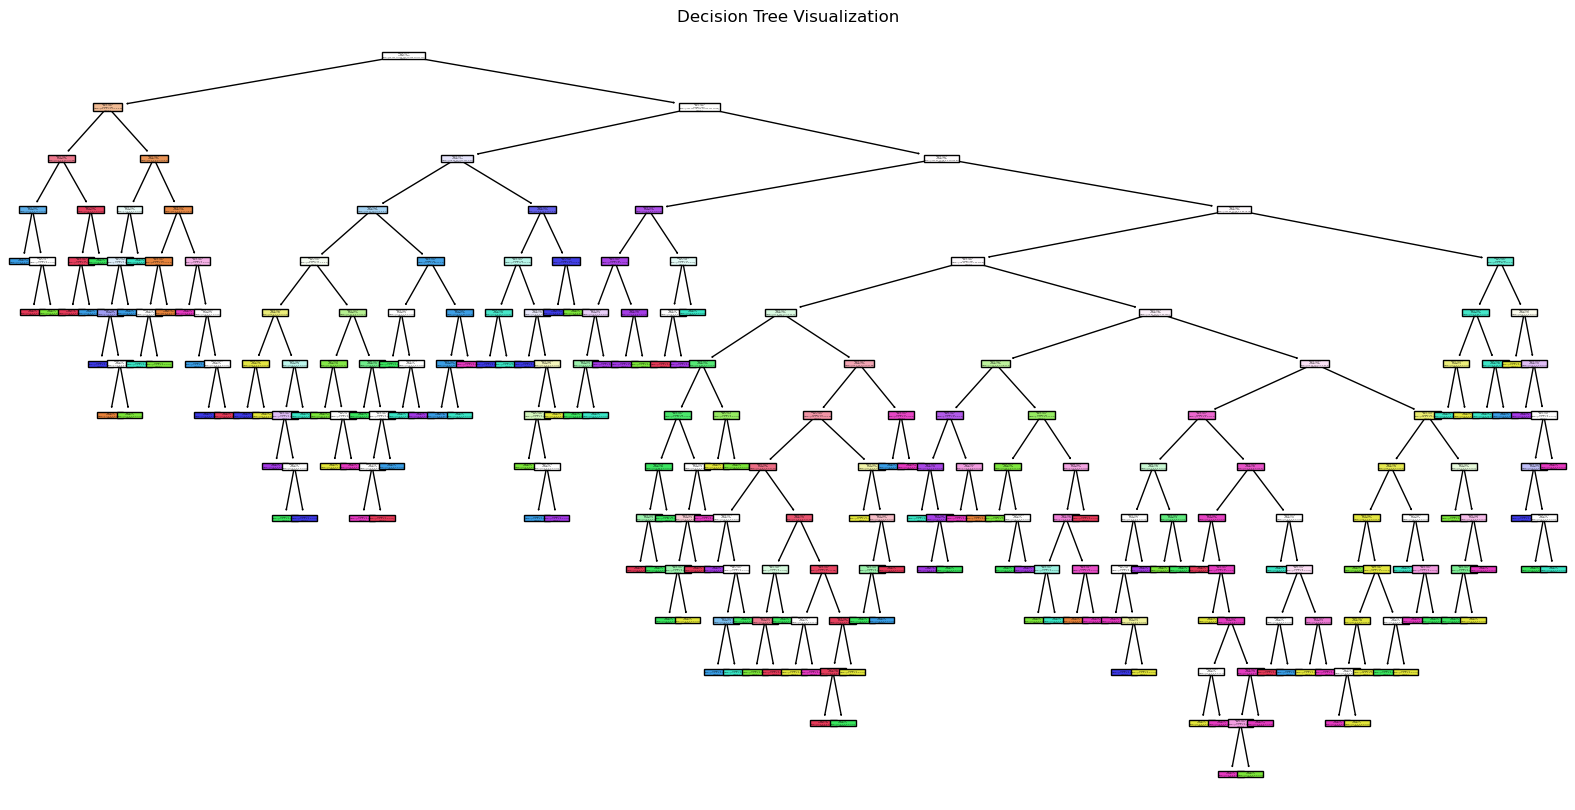

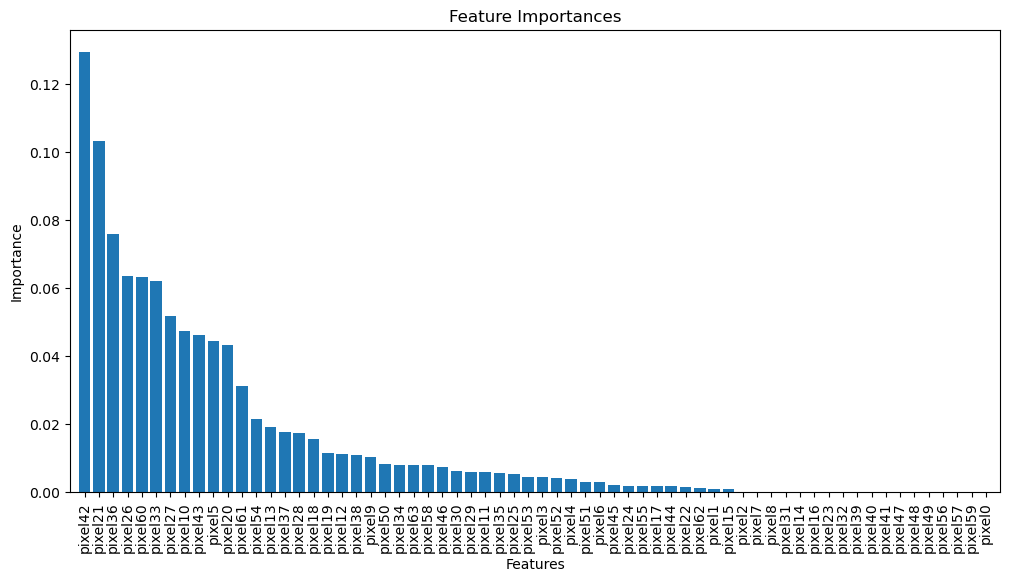

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import validation_curve

digits = load_digits()
X = digits.data
y = digits.target
feature_names = [f'pixel{i}' for i in range(X.shape[1])]
target_names = [str(label) for label in digits.target_names]  # Convert to list of strings

df = pd.DataFrame(X, columns=feature_names)
df['target'] = y

print("Dataset Overview:")
print(df.head())

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = DecisionTreeClassifier(
    criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    class_weight=None,
    random_state=42,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0
)


model.fit(X_train, y_train)


y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

plt.figure(figsize=(20, 10))
plot_tree(model, feature_names=feature_names, class_names=target_names, filled=True)
plt.title("Decision Tree Visualization")
plt.show()

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importance(model, feature_names)

def plot_validation_curve(X, y, param_name, param_range, title):
    train_scores, test_scores = validation_curve(
        DecisionTreeClassifier(random_state=42), X, y, param_name=param_name, param_range=param_range, cv=5
    )
    plt.figure(figsize=(12, 6))
    plt.plot(param_range, np.mean(train_scores, axis=1), label='Training score', color='blue')
    plt.plot(param_range, np.mean(test_scores, axis=1), label='Cross-validation score', color='red')
    plt.title(title)
    plt.xlabel(param_name)
    plt.ylabel('Score')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_validation_curve(X_train, y_train, 'max_depth', np.arange(1, 21), 'Validation Curve for Decision Tree')

def plot_learning_curve(X, y, model):
    train_sizes, train_scores, test_scores = learning_curve(
        model, X, y, cv=5, n_jobs=-1,
        train_sizes=np.linspace(0.1, 1.0, 10),
        scoring='accuracy'
    )
    plt.figure(figsize=(12, 8))
    plt.plot(train_sizes, np.mean(train_scores, axis=1), label='Training Score', color='blue')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), label='Cross-validation Score', color='red')
    plt.xlabel('Number of Training Samples')
    plt.ylabel('Score')
    plt.title('Learning Curves')
    plt.legend()
    plt.grid(True)
    plt.show()

plot_learning_curve(X_train, y_train, model)


# **`RandomForestClassifier` Class**

The `RandomForestClassifier` is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve predictive accuracy and control overfitting. Trees in the forest use the best split strategy, which is equivalent to passing `splitter="best"` to the underlying `DecisionTreeRegressor`. 

## **Parameters**

- **`n_estimators`** (`int`, default=100): The number of trees in the forest.

- **`criterion`** (`{“gini”, “entropy”, “log_loss”}`, default=”gini”): The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “log_loss” and “entropy” for Shannon information gain.

- **`max_depth`** (`int`, default=None): The maximum depth of the tree. If None, nodes are expanded until all leaves are pure or contain fewer than `min_samples_split` samples.

- **`min_samples_split`** (`int` or `float`, default=2): The minimum number of samples required to split an internal node. If `int`, it is the minimum number. If `float`, it is a fraction.

- **`min_samples_leaf`** (`int` or `float`, default=1): The minimum number of samples required to be at a leaf node. If `int`, it is the minimum number. If `float`, it is a fraction.

- **`min_weight_fraction_leaf`** (`float`, default=0.0): The minimum weighted fraction of the sum total of weights required to be at a leaf node.

- **`max_features`** (`{“sqrt”, “log2”, None}`, `int` or `float`, default=”sqrt”): The number of features to consider when looking for the best split. If `int`, it is the number of features. If `float`, it is a fraction. If `“sqrt”`, it is the square root of the number of features. If `“log2”`, it is the base-2 logarithm of the number of features.

- **`max_leaf_nodes`** (`int`, default=None): Grow trees with `max_leaf_nodes` in best-first fashion. If None, there is no limit.

- **`min_impurity_decrease`** (`float`, default=0.0): A node will be split if the split induces a decrease of impurity greater than or equal to this value.

- **`bootstrap`** (`bool`, default=True): Whether bootstrap samples are used when building trees. If False, the whole dataset is used.

- **`oob_score`** (`bool` or callable, default=False): Whether to use out-of-bag samples to estimate the generalization score.

- **`n_jobs`** (`int`, default=None): The number of jobs to run in parallel. If None, it uses 1 processor. If -1, it uses all processors.

- **`random_state`** (`int`, `RandomState` instance or None, default=None): Controls the randomness of the bootstrapping of the samples and the sampling of features.

- **`verbose`** (`int`, default=0): Controls the verbosity when fitting and predicting.

- **`warm_start`** (`bool`, default=False): If True, reuse the solution of the previous call to fit and add more estimators to the ensemble.

- **`class_weight`** (`{“balanced”, “balanced_subsample”}`, `dict` or list of dicts, default=None): Weights associated with classes.

- **`ccp_alpha`** (`non-negative float`, default=0.0): Complexity parameter used for Minimal Cost-Complexity Pruning.

- **`max_samples`** (`int` or `float`, default=None): If bootstrap is True, the number of samples to draw from X to train each base estimator.

- **`monotonic_cst`** (`array-like of int`, default=None): Indicates the monotonicity constraint to enforce on each feature.

## **Attributes**

- **`estimators_`** (`list of DecisionTreeClassifier`): The collection of fitted sub-estimators.

- **`feature_importances_`** (`ndarray of shape (n_features,)`): The impurity-based feature importances.

- **`oob_score_`** (`float`): Score of the training dataset obtained using an out-of-bag estimate. Only available if `oob_score` is True.

- **`oob_decision_function_`** (`ndarray of shape (n_samples, n_classes)` or `(n_samples, n_classes, n_outputs)`): Decision function computed with out-of-bag estimate on the training set.

## **Methods**

- **`fit(X, y, sample_weight=None)`**: Build a forest of trees from the training set.

- **`predict(X)`**: Predict class for X.

- **`predict_proba(X)`**: Predict class probabilities for X.

- **`predict_log_proba(X)`**: Predict class log-probabilities for X.

- **`score(X, y, sample_weight=None)`**: Return the mean accuracy on the given test data and labels.

- **`apply(X)`**: Apply trees in the forest to X, returning leaf indices.

- **`decision_path(X)`**: Return the decision path in the forest.



Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99        53
           1       0.96      1.00      0.98        50
           2       1.00      1.00      1.00        47
           3       0.98      0.96      0.97        54
           4       0.97      1.00      0.98        60
           5       0.97      0.95      0.96        66
           6       0.98      0.98      0.98        53
           7       0.98      0.98      0.98        55
           8       0.95      0.95      0.95        43
           9       0.97      0.95      0.96        59

    accuracy                           0.98       540
   macro avg       0.98      0.98      0.98       540
weighted avg       0.98      0.98      0.98       540

Confusion Matrix:
[[52  0  0  0  1  0  0  0  0  0]
 [ 0 50  0  0  0  0  0  0  0  0]
 [ 0  0 47  0  0  0  0  0  0  0]
 [ 0  0  0 52  0  0  0  0  2  0]
 [ 0  0  0  0 60  0  0  0  0  0]
 [ 0  0  0  0  1 63  1  0  0  1]
 [

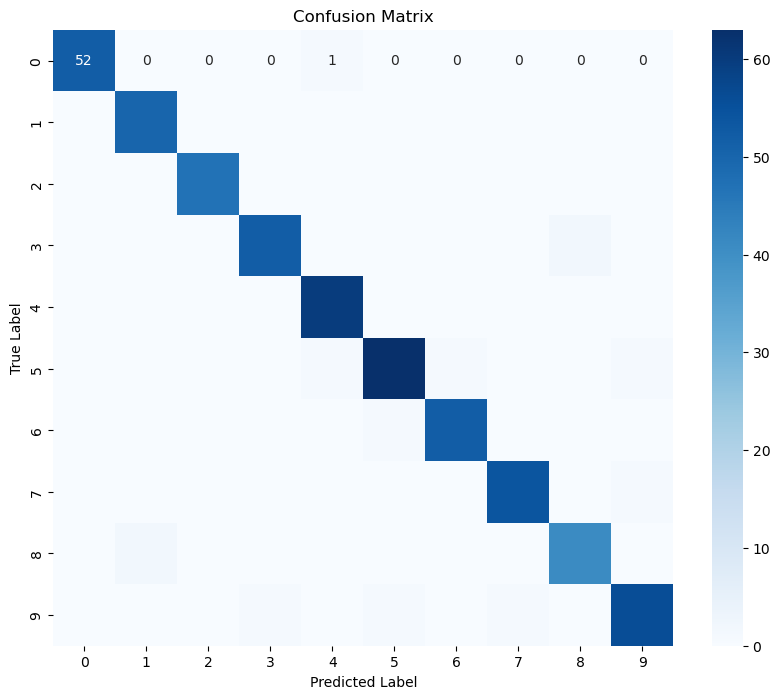

Overall Accuracy: 0.98
Per-Class Accuracy:
Digit 0: 0.98
Digit 1: 1.00
Digit 2: 1.00
Digit 3: 0.96
Digit 4: 1.00
Digit 5: 0.95
Digit 6: 0.98
Digit 7: 0.98
Digit 8: 0.95
Digit 9: 0.95


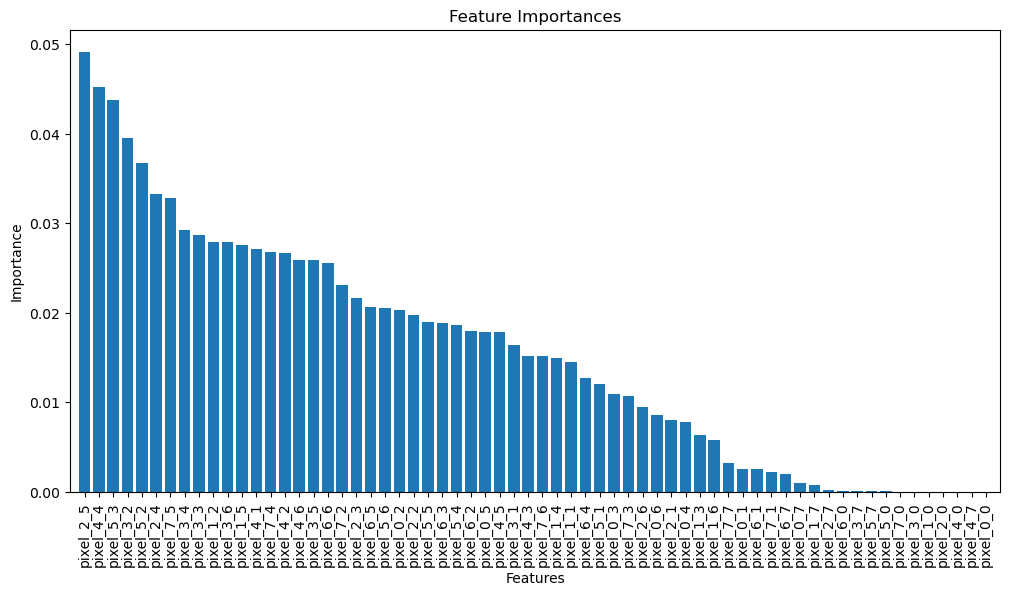

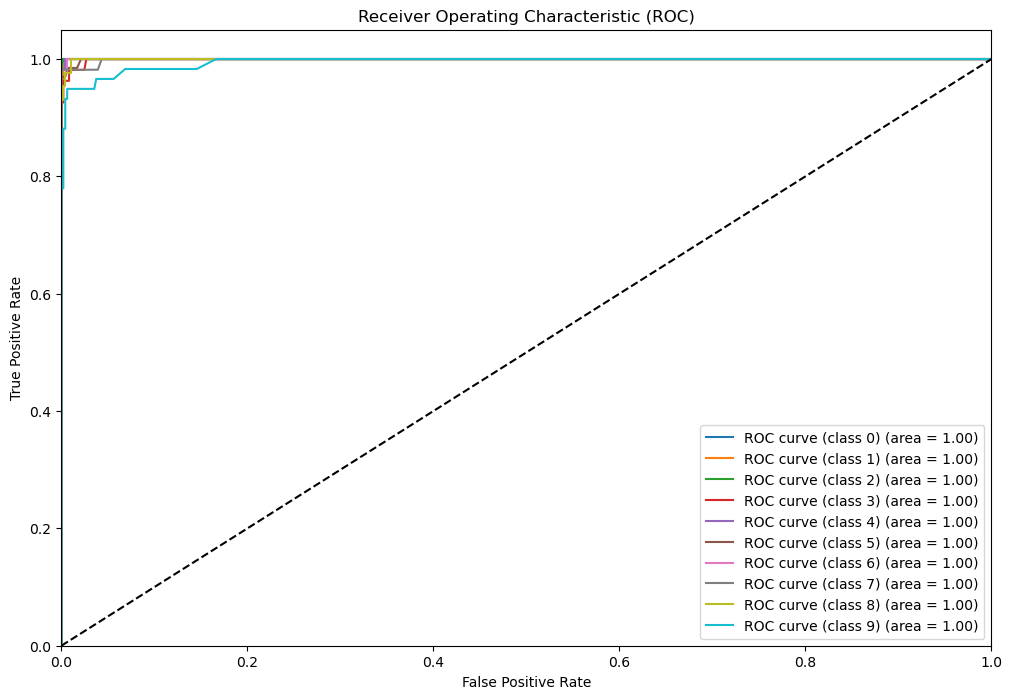

In [50]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import label_binarize
from sklearn.multiclass import OneVsRestClassifier

digits = load_digits()
X = digits.data
y = digits.target
feature_names = digits.feature_names
target_names = [str(i) for i in range(10)]  # Digits are 0-9

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = RandomForestClassifier(
    n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='sqrt',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=42,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

def per_class_accuracy(conf_matrix):
    class_accuracies = {}
    for i in range(len(target_names)):
        true_positives = conf_matrix[i, i]
        total_actuals = np.sum(conf_matrix[i, :])
        accuracy = true_positives / total_actuals if total_actuals > 0 else 0
        class_accuracies[target_names[i]] = accuracy
    return class_accuracies

class_accuracies = per_class_accuracy(conf_matrix)
print("Per-Class Accuracy:")
for class_name, accuracy in class_accuracies.items():
    print(f"Digit {class_name}: {accuracy:.2f}")

def plot_feature_importance(model, feature_names):
    importances = model.feature_importances_
    indices = np.argsort(importances)[::-1]
    
    plt.figure(figsize=(12, 6))
    plt.title("Feature Importances")
    plt.bar(range(X.shape[1]), importances[indices], align="center")
    plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Features')
    plt.ylabel('Importance')
    plt.show()

plot_feature_importance(model, feature_names)

def plot_roc_curve(y_test, y_score, target_names):
    y_test_bin = label_binarize(y_test, classes=np.arange(len(target_names)))
    n_classes = len(target_names)
    fpr = {}
    tpr = {}
    roc_auc = {}
    
    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])
    
    plt.figure(figsize=(12, 8))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label=f'ROC curve (class {target_names[i]}) (area = {roc_auc[i]:.2f})')
    
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC)')
    plt.legend(loc='lower right')
    plt.show()

y_score = model.predict_proba(X_test)
plot_roc_curve(y_test, y_score, target_names)


# **`GradientBoostingClassifier`**

The `GradientBoostingClassifier` from `sklearn.ensemble` is a gradient boosting algorithm for classification tasks. It builds an additive model in a forward stage-wise fashion, optimizing arbitrary differentiable loss functions. The model is constructed using multiple decision trees that are fitted on the negative gradient of the loss function.

## **Parameters**

- **`loss`**: `{'log_loss', 'exponential'}`, default='log_loss'
  - The loss function to be optimized. 'log_loss' refers to binomial and multinomial deviance (similar to logistic regression). 'exponential' recovers the AdaBoost algorithm.

- **`learning_rate`**: `float`, default=0.1
  - Learning rate shrinks the contribution of each tree by `learning_rate`. A trade-off exists between `learning_rate` and `n_estimators`.

- **`n_estimators`**: `int`, default=100
  - The number of boosting stages to perform. Generally, a larger number leads to better performance.

- **`subsample`**: `float`, default=1.0
  - The fraction of samples used for fitting individual base learners. Subsampling results in Stochastic Gradient Boosting, which reduces variance but increases bias.

- **`criterion`**: `{'friedman_mse', 'squared_error'}`, default='friedman_mse'
  - The function to measure the quality of a split. 'friedman_mse' is generally preferred for its approximation capabilities.

- **`min_samples_split`**: `int` or `float`, default=2
  - Minimum number of samples required to split an internal node. Can be an integer or a float (fraction of total samples).

- **`min_samples_leaf`**: `int` or `float`, default=1
  - Minimum number of samples required at a leaf node. Can be an integer or a float (fraction of total samples).

- **`min_weight_fraction_leaf`**: `float`, default=0.0
  - Minimum weighted fraction of the sum total of weights required to be at a leaf node.

- **`max_depth`**: `int` or `None`, default=3
  - Maximum depth of the individual regression estimators.

- **`min_impurity_decrease`**: `float`, default=0.0
  - A node will be split if this split induces a decrease of impurity greater than or equal to this value.

- **`init`**: `estimator` or 'zero', default=None
  - An estimator used to compute the initial predictions. 'zero' sets the initial raw predictions to zero.

- **`random_state`**: `int`, `RandomState` instance or `None`, default=None
  - Controls the random seed for reproducibility.

- **`max_features`**: `{'sqrt', 'log2'}`, `int`, or `float`, default=None
  - Number of features to consider when looking for the best split. Can be an integer, a float (fraction), 'sqrt', or 'log2'.

- **`verbose`**: `int`, default=0
  - Verbosity of the output. If greater than 0, prints progress and performance.

- **`max_leaf_nodes`**: `int` or `None`, default=None
  - Grow trees with `max_leaf_nodes` in best-first fashion.

- **`warm_start`**: `bool`, default=False
  - When True, reuse the solution of the previous call to `fit` and add more estimators to the ensemble.

- **`validation_fraction`**: `float`, default=0.1
  - Proportion of training data to set aside as a validation set for early stopping.

- **`n_iter_no_change`**: `int`, default=None
  - Number of iterations with no improvement to wait before stopping training.

- **`tol`**: `float`, default=1e-4
  - Tolerance for early stopping. Training stops when loss does not improve by at least `tol`.

- **`ccp_alpha`**: `non-negative float`, default=0.0
  - Complexity parameter for Minimal Cost-Complexity Pruning. Subtree with the largest cost complexity smaller than `ccp_alpha` will be chosen.

## **Attributes**

- **`feature_importances_`**: `ndarray of shape (n_features,)`
  - Impurity-based feature importances.

- **`oob_improvement_`**: `ndarray of shape (n_estimators,)`
  - Improvement in loss on the out-of-bag samples relative to the previous iteration.

- **`oob_scores_`**: `ndarray of shape (n_estimators,)`
  - Full history of the loss values on the out-of-bag samples.

- **`train_score_`**: `ndarray of shape (n_estimators,)`
  - Loss of the model at iteration `i` on the in-bag sample.

- **`estimators_`**: `ndarray of DecisionTreeRegressor of shape (n_estimators, n_trees_per_iteration_)`
  - Collection of fitted sub-estimators.

- **`classes_`**: `ndarray of shape (n_classes,)`
  - Class labels.

- **`n_features_in_`**: `int`
  - Number of features seen during fit.

- **`feature_names_in_`**: `ndarray of shape (n_features_in_,)`
  - Names of features seen during fit.

- **`n_classes_`**: `int`
  - Number of classes.

## **Methods**

- **`fit(X, y, sample_weight=None, monitor=None)`**
  - Fit the gradient boosting model.

- **`predict(X)`**
  - Predict class for `X`.

- **`predict_proba(X)`**
  - Predict class probabilities for `X`.

- **`predict_log_proba(X)`**
  - Predict class log-probabilities for `X`.

- **`decision_function(X)`**
  - Compute the decision function of `X`.

- **`apply(X)`**
  - Apply trees in the ensemble to `X`, returning leaf indices.

- **`score(X, y, sample_weight=None)`**
  - Return the mean accuracy on the given test data and labels.



Classification Report:
              precision    recall  f1-score   support

   malignant       0.95      0.94      0.94        63
      benign       0.96      0.97      0.97       108

    accuracy                           0.96       171
   macro avg       0.96      0.95      0.96       171
weighted avg       0.96      0.96      0.96       171

Confusion Matrix:
[[ 59   4]
 [  3 105]]


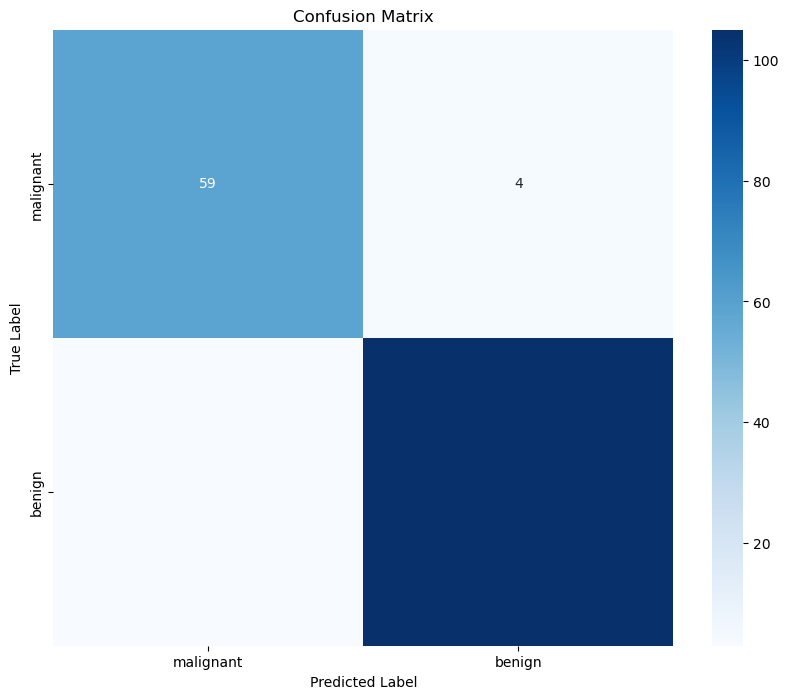

Overall Accuracy: 0.96
Per-Class Accuracy:
malignant: 0.94
benign: 0.97


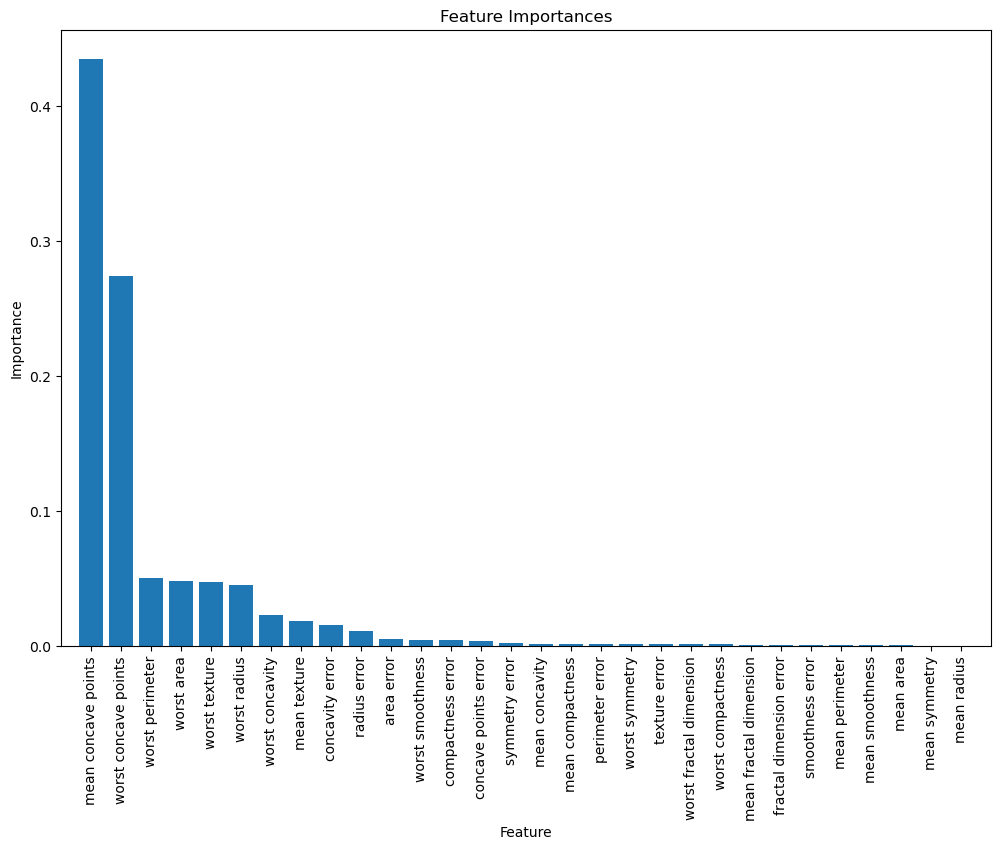

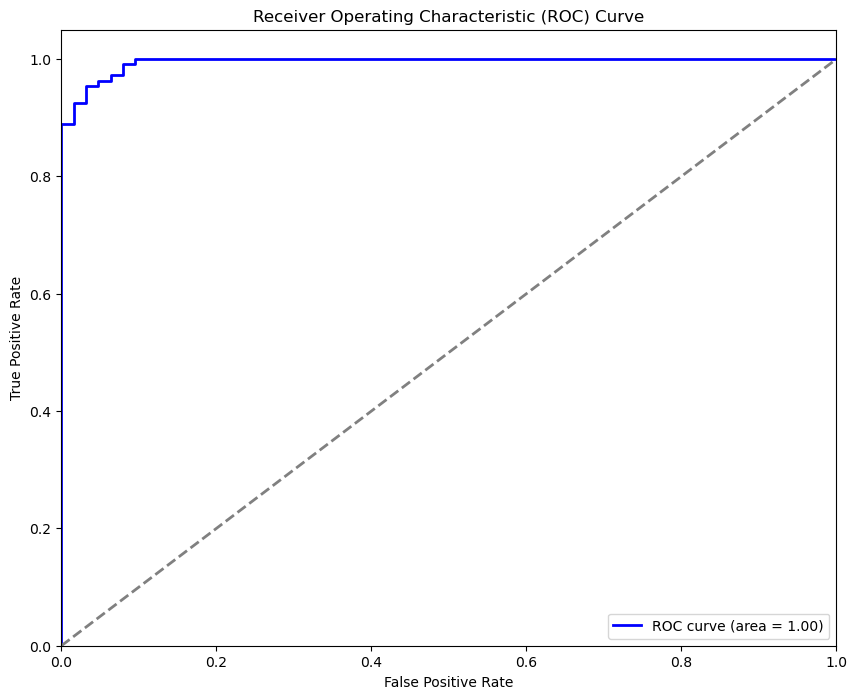

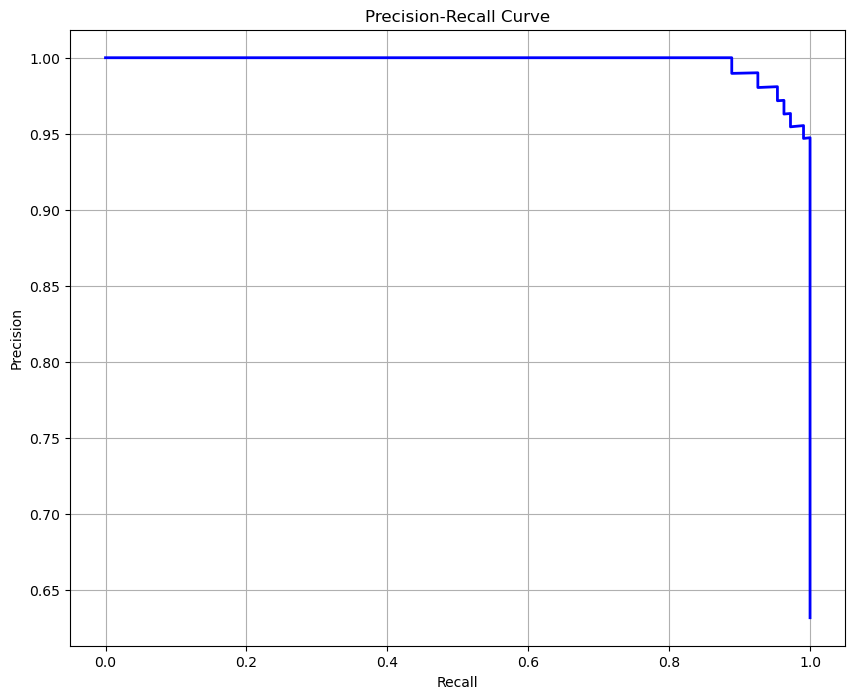

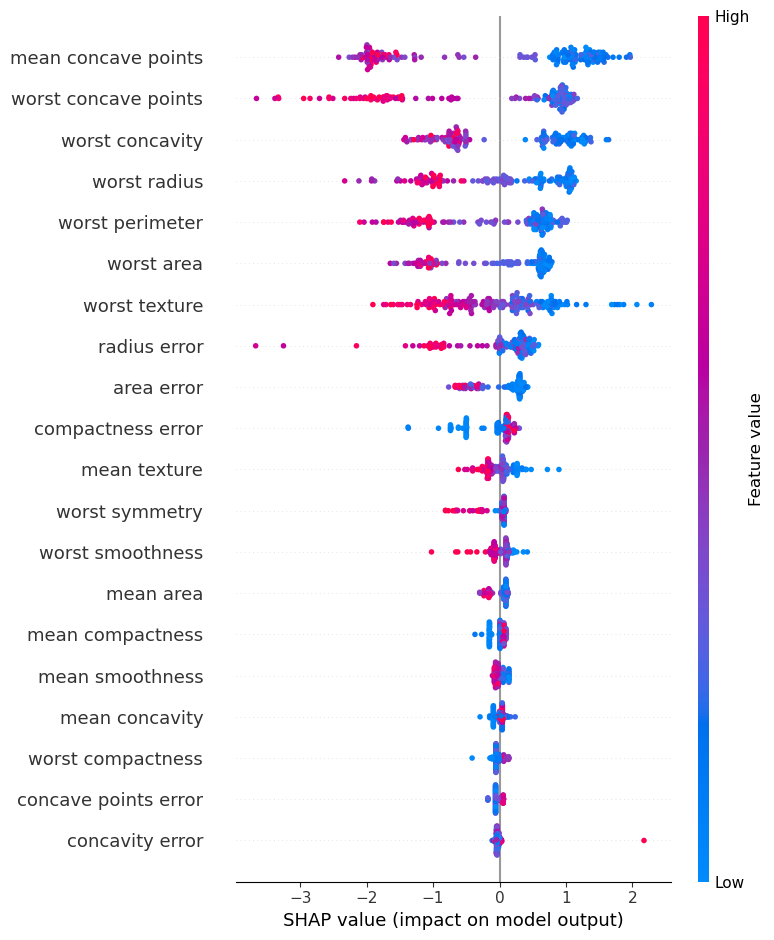

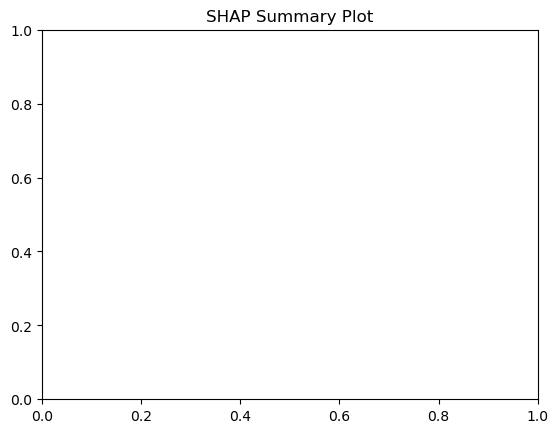

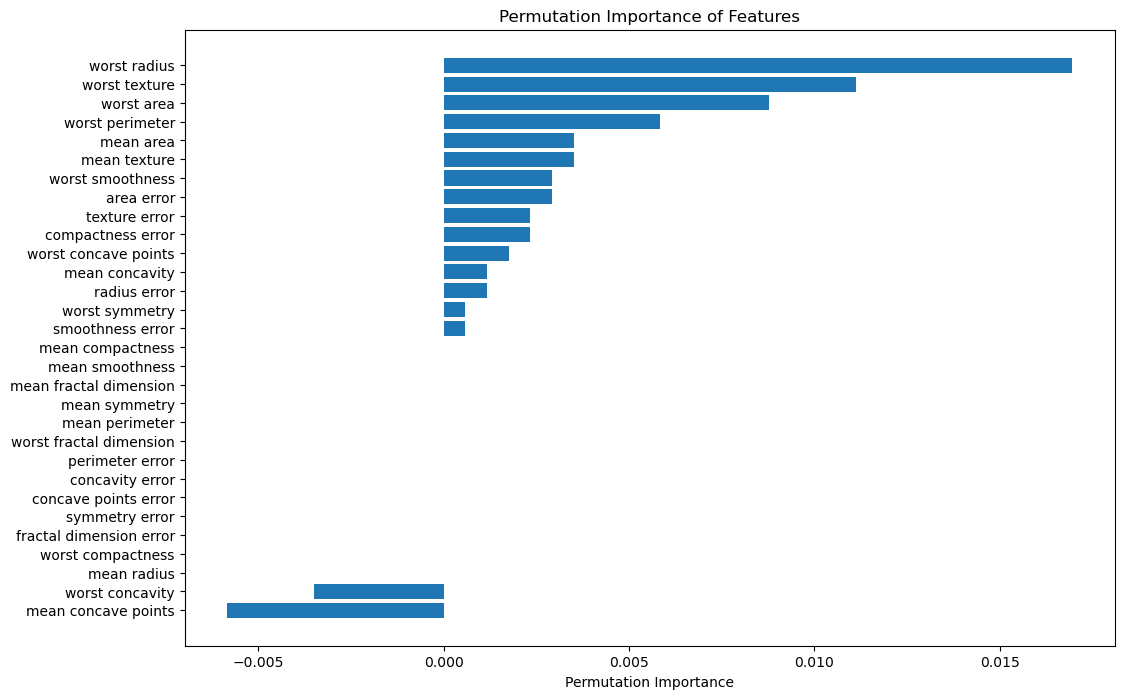

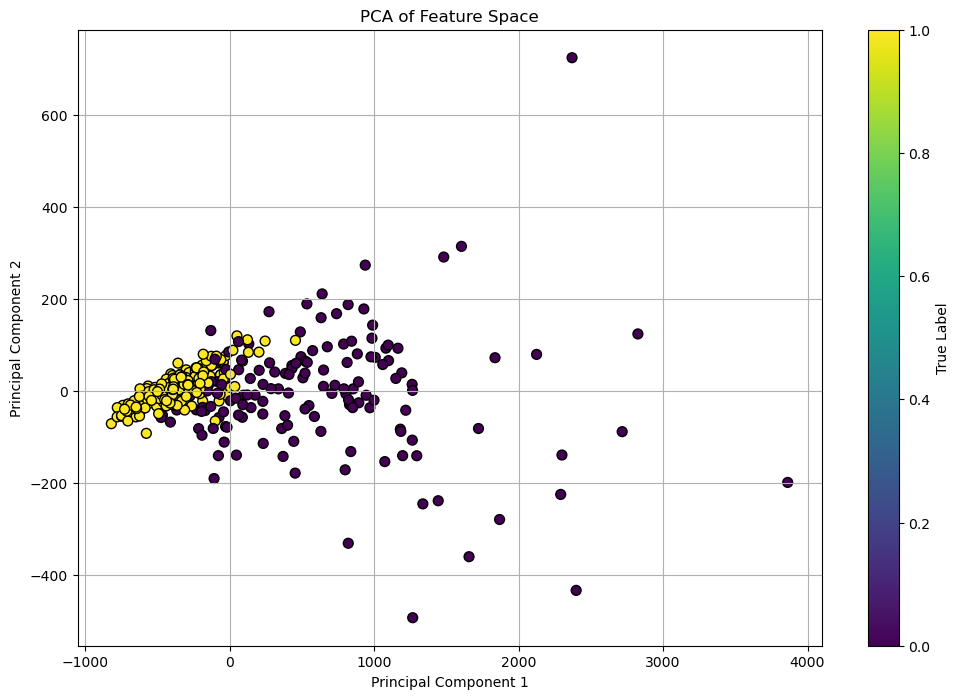

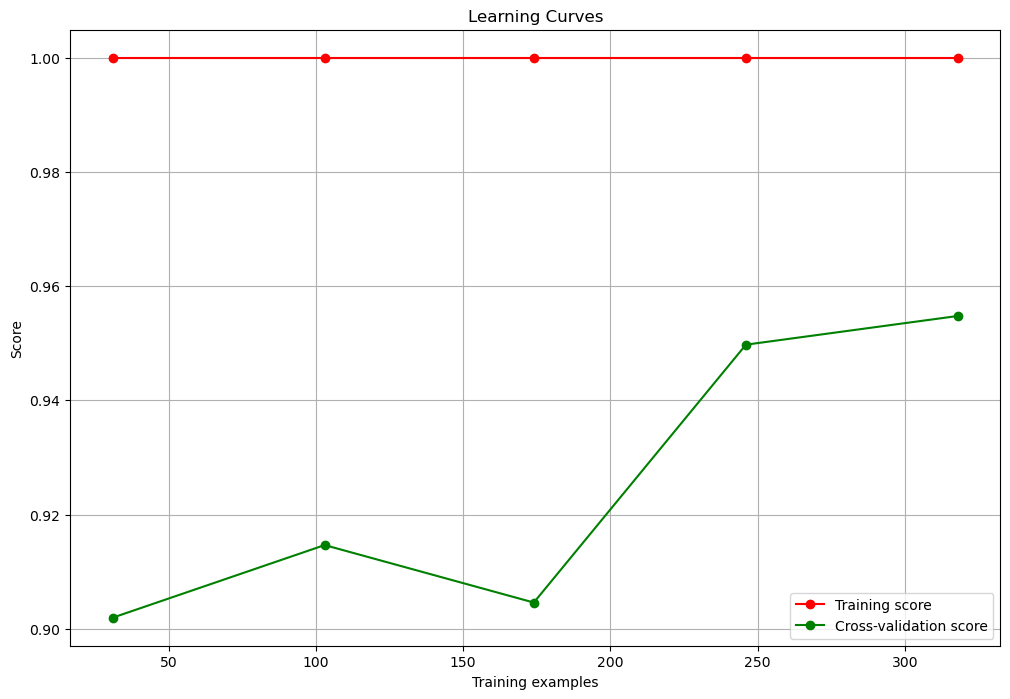

In [51]:
import numpy as np
import pandas as pd
from sklearn.datasets import load_breast_cancer
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc, precision_recall_curve
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt
import seaborn as sns
import shap
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve

cancer = load_breast_cancer()
X = cancer.data
y = cancer.target
feature_names = cancer.feature_names
target_names = cancer.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

model = GradientBoostingClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=3,
    random_state=42
)

model.fit(X_train, y_train)

y_pred = model.predict(X_test)

print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=target_names))

print("Confusion Matrix:")
conf_matrix = confusion_matrix(y_test, y_pred)
print(conf_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=target_names, yticklabels=target_names)
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

accuracy = accuracy_score(y_test, y_pred)
print(f"Overall Accuracy: {accuracy:.2f}")

def per_class_accuracy(conf_matrix):
    class_accuracies = {}
    for i in range(len(target_names)):
        true_positives = conf_matrix[i, i]
        total_actuals = np.sum(conf_matrix[i, :])
        accuracy = true_positives / total_actuals if total_actuals > 0 else 0
        class_accuracies[target_names[i]] = accuracy
    return class_accuracies

class_accuracies = per_class_accuracy(conf_matrix)
print("Per-Class Accuracy:")
for class_name, accuracy in class_accuracies.items():
    print(f"{class_name}: {accuracy:.2f}")

importances = model.feature_importances_
indices = np.argsort(importances)[::-1]

plt.figure(figsize=(12, 8))
plt.title('Feature Importances')
plt.bar(range(X.shape[1]), importances[indices], align='center')
plt.xticks(range(X.shape[1]), feature_names[indices], rotation=90)
plt.xlim([-1, X.shape[1]])
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.show()

fpr, tpr, _ = roc_curve(y_test, model.predict_proba(X_test)[:, 1])
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(10, 8))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (area = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

precision, recall, _ = precision_recall_curve(y_test, model.predict_proba(X_test)[:, 1])

plt.figure(figsize=(10, 8))
plt.plot(recall, precision, color='blue', lw=2)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.grid(True)
plt.show()

explainer = shap.Explainer(model, X_train)
shap_values = explainer(X_test)

plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values, X_test, feature_names=feature_names)
plt.title('SHAP Summary Plot')
plt.show()

perm_importance = permutation_importance(model, X_test, y_test, n_repeats=10, random_state=42)

sorted_idx = perm_importance.importances_mean.argsort()
plt.figure(figsize=(12, 8))
plt.barh(range(X.shape[1]), perm_importance.importances_mean[sorted_idx], align='center')
plt.yticks(range(X.shape[1]), feature_names[sorted_idx])
plt.xlabel('Permutation Importance')
plt.title('Permutation Importance of Features')
plt.show()

pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

plt.figure(figsize=(12, 8))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=y_train, cmap='viridis', edgecolor='k', s=50)
plt.colorbar(label='True Label')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.title('PCA of Feature Space')
plt.grid(True)
plt.show()

train_sizes, train_scores, test_scores = learning_curve(model, X_train, y_train, cv=5)

plt.figure(figsize=(12, 8))
plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
plt.xlabel('Training examples')
plt.ylabel('Score')
plt.title('Learning Curves')
plt.legend()
plt.grid(True)
plt.show()


# **Naive Bayes**

Naive Bayes methods are supervised learning algorithms based on Bayes' theorem with the assumption of conditional independence between features given the class variable. Bayes' theorem is:

$$P(C \mid X) = \frac{P(C) \cdot P(X \mid C)}{P(X)}$$

With the naive assumption that features are independent:

$$P(X \mid C) = \prod_{i=1}^{n} P(x_i \mid C)$$

The classification rule simplifies to:

$$\hat{C} = \arg\max_{C} P(C) \cdot \prod_{i=1}^{n} P(x_i \mid C)$$

**Naive Bayes Classifiers**:
- **Gaussian Naive Bayes**: Assumes features follow a Gaussian distribution.
- **Multinomial Naive Bayes**: Used for multinomially distributed data, commonly in text classification.
- **Complement Naive Bayes**: An adaptation of Multinomial Naive Bayes for imbalanced datasets.
- **Bernoulli Naive Bayes**: Assumes features follow a Bernoulli distribution; useful for binary/boolean features.
- **Categorical Naive Bayes**: Assumes features follow a categorical distribution.



Classifier Accuracy Scores:
Gaussian Naive Bayes: 0.98
Multinomial Naive Bayes: 0.96
Bernoulli Naive Bayes: 0.29
Complement Naive Bayes: 0.71
Logistic Regression: 1.00
Random Forest: 1.00


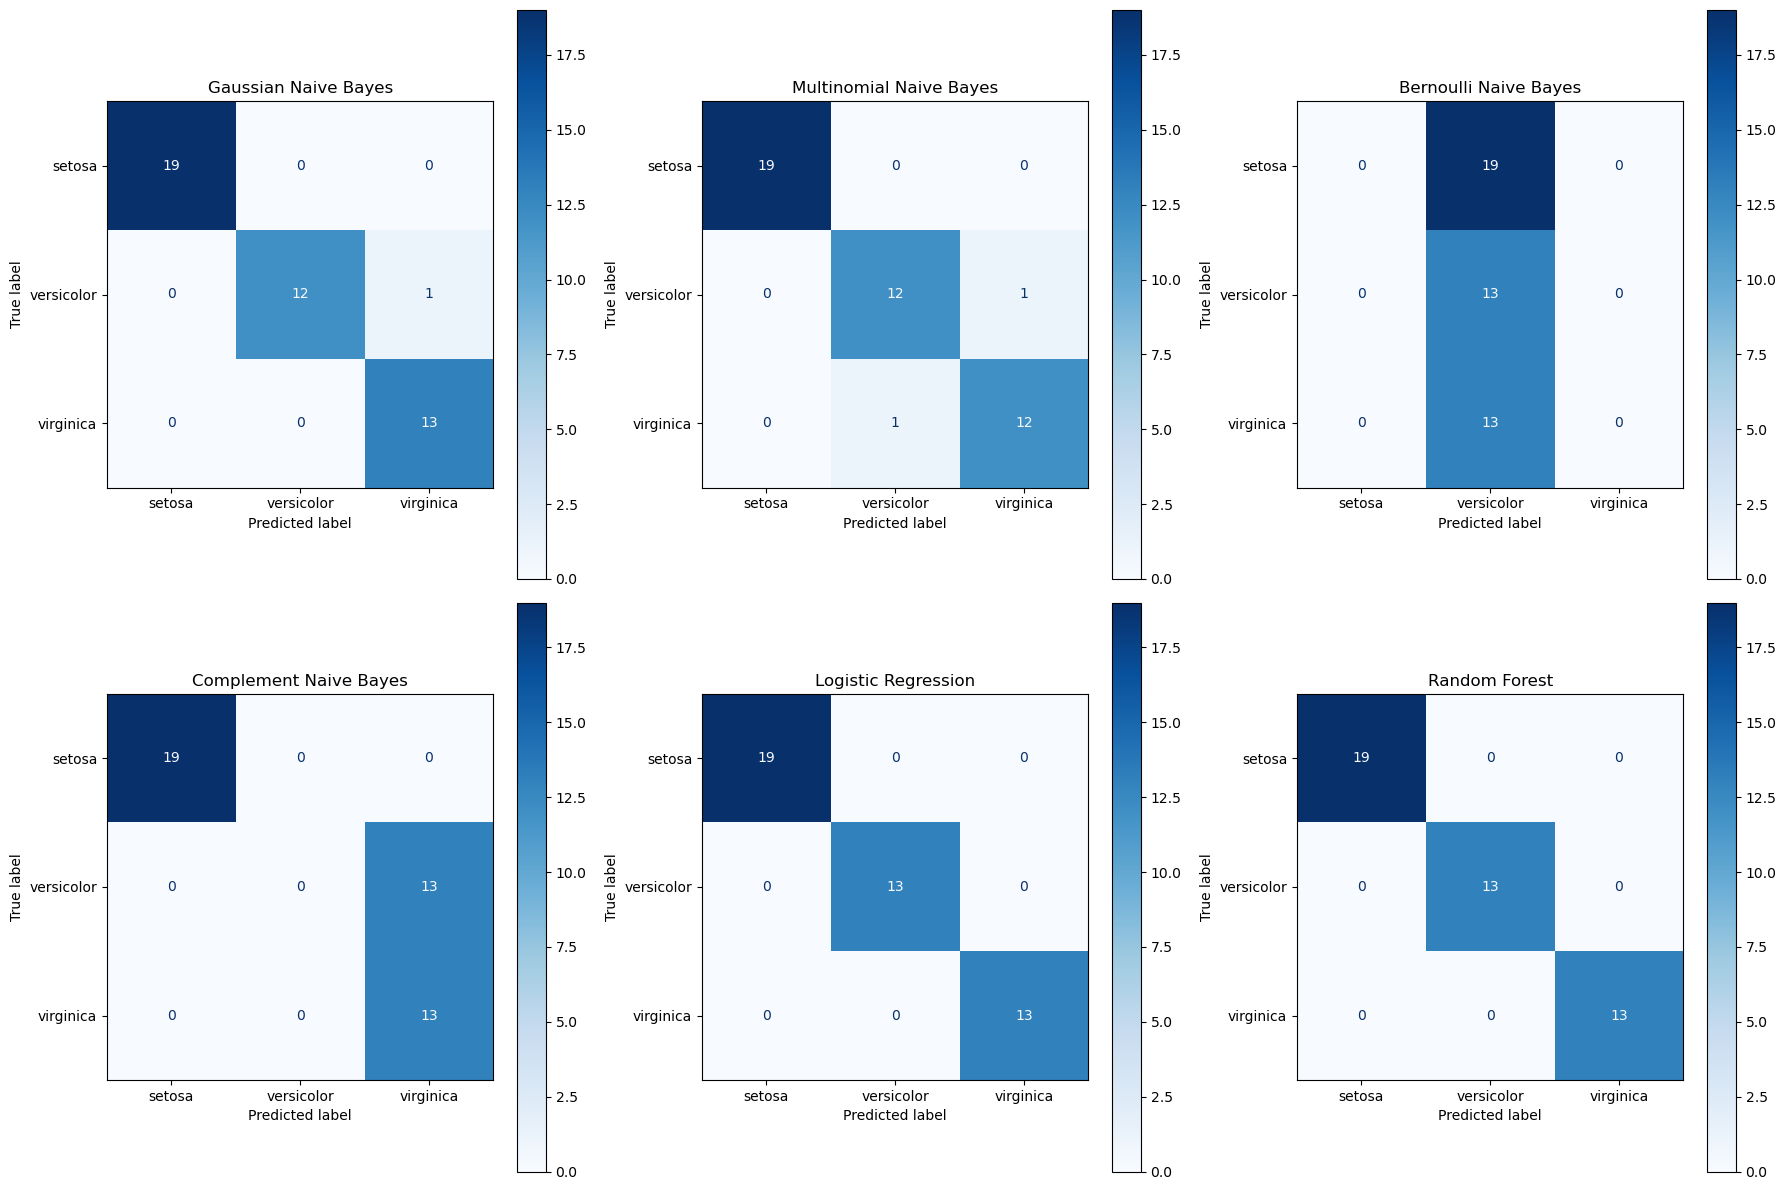

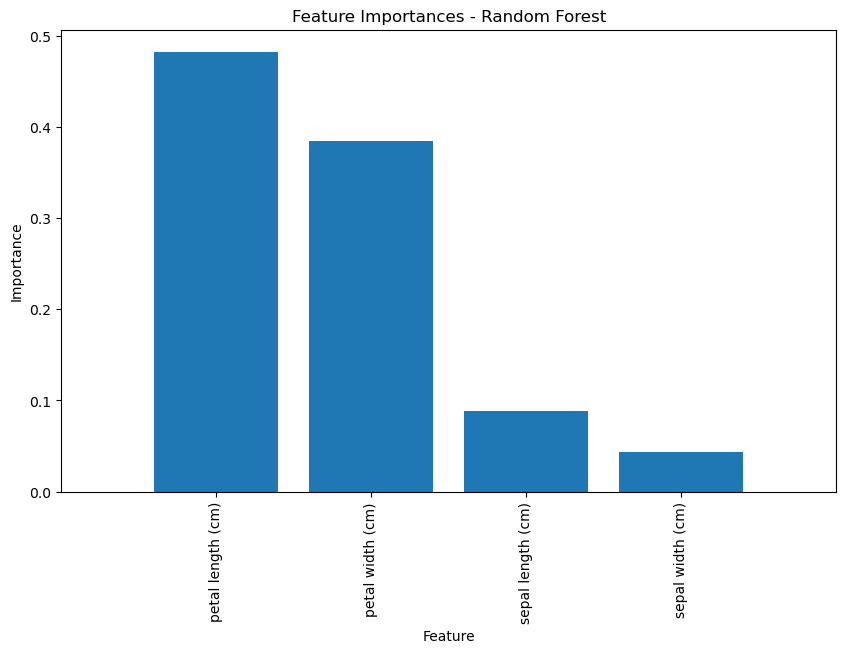

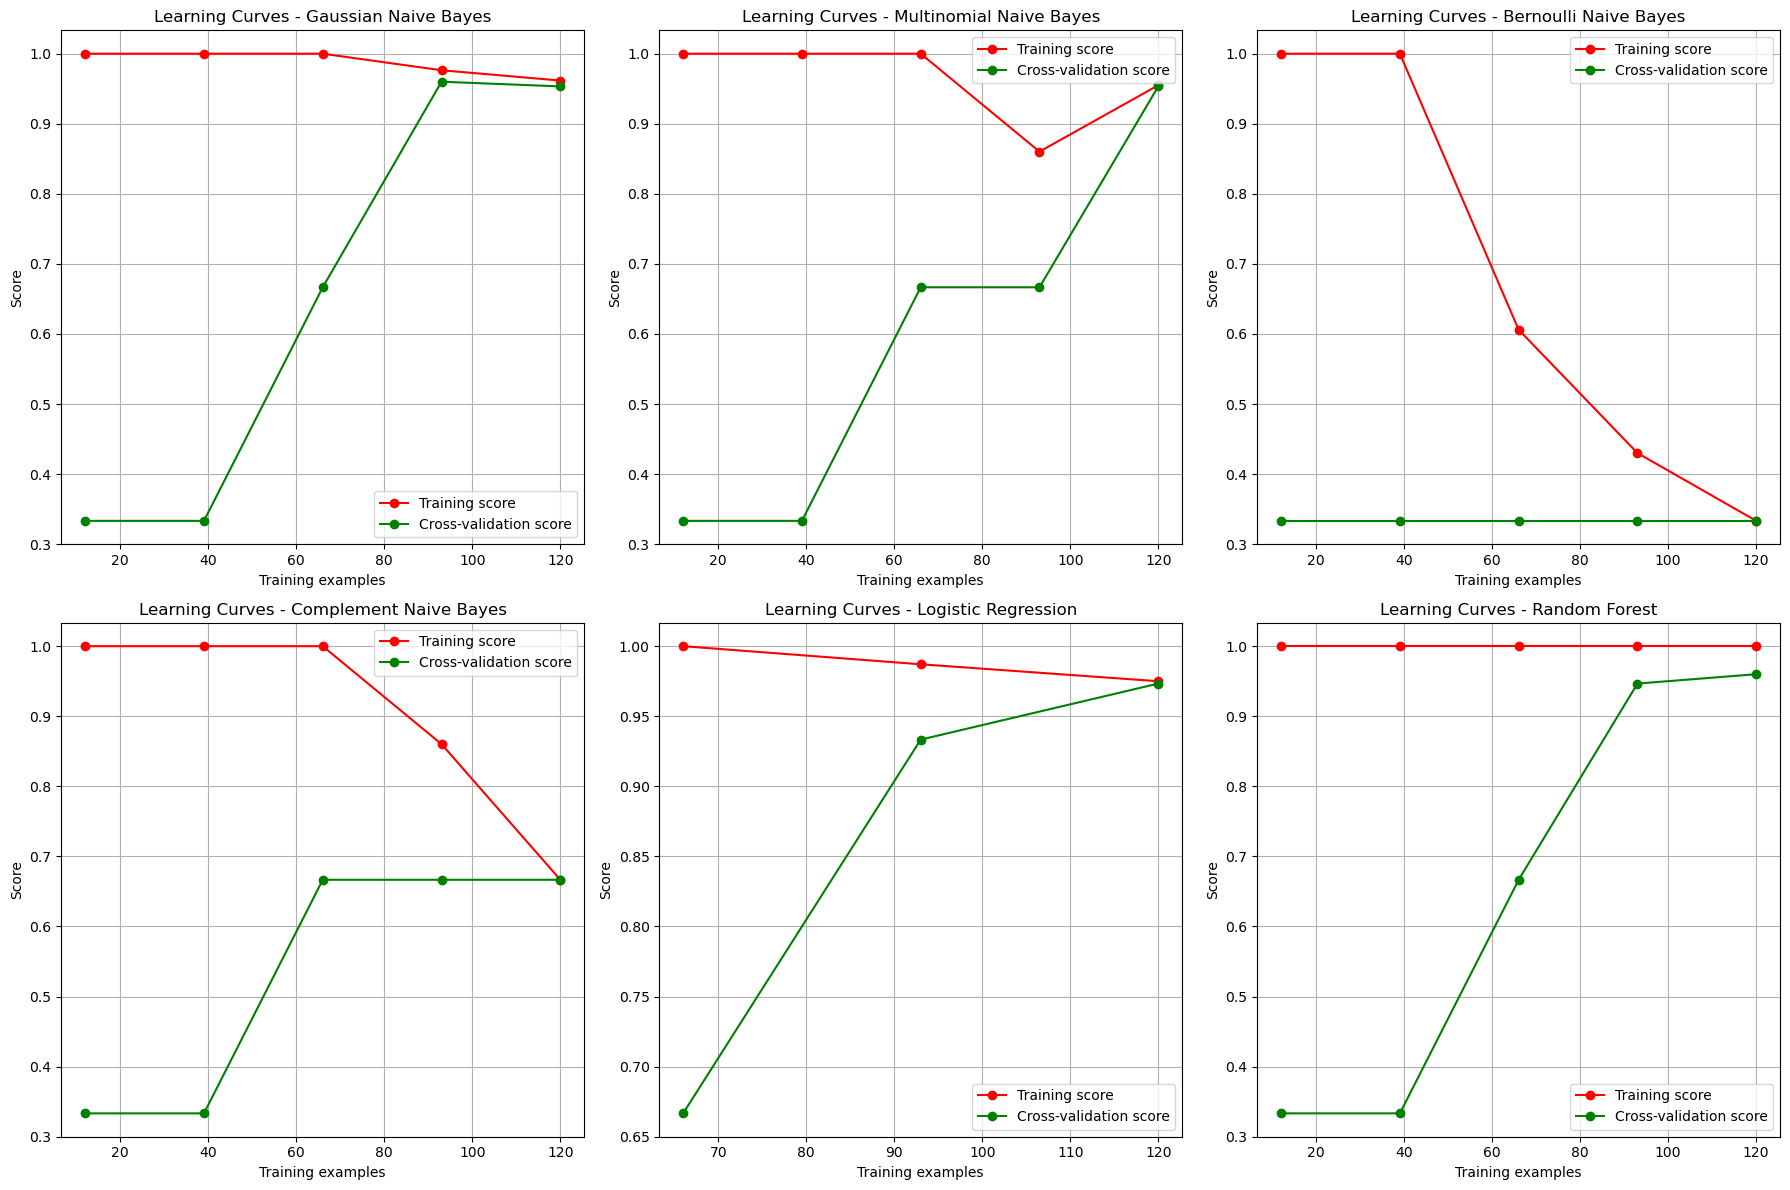

In [52]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay, classification_report
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB, ComplementNB
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import learning_curve

data = load_iris()
X = data.data
y = data.target
feature_names = data.feature_names
class_names = data.target_names

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

classifiers = {
    "Gaussian Naive Bayes": GaussianNB(),
    "Multinomial Naive Bayes": MultinomialNB(),
    "Bernoulli Naive Bayes": BernoulliNB(),
    "Complement Naive Bayes": ComplementNB(),
    "Logistic Regression": LogisticRegression(max_iter=200),
    "Random Forest": RandomForestClassifier(n_estimators=100)
}

results = {}
for name, clf in classifiers.items():
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    results[name] = {
        "accuracy": accuracy,
        "confusion_matrix": confusion_matrix(y_test, y_pred),
        "classification_report": classification_report(y_test, y_pred, target_names=class_names, output_dict=True)
    }

print("Classifier Accuracy Scores:")
for name, result in results.items():
    print(f"{name}: {result['accuracy']:.2f}")

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for i, (name, result) in enumerate(results.items()):
    cm = result["confusion_matrix"]
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=class_names)
    disp.plot(ax=axes[i], cmap=plt.cm.Blues, values_format='d')
    axes[i].set_title(name)

plt.tight_layout()
plt.show()


if "Random Forest" in classifiers:
    rf = classifiers["Random Forest"]
    importances = rf.feature_importances_
    indices = np.argsort(importances)[::-1]

    plt.figure(figsize=(10, 6))
    plt.title('Feature Importances - Random Forest')
    plt.bar(range(X.shape[1]), importances[indices], align='center')
    plt.xticks(range(X.shape[1]), np.array(feature_names)[indices], rotation=90)
    plt.xlim([-1, X.shape[1]])
    plt.xlabel('Feature')
    plt.ylabel('Importance')
    plt.show()

plt.figure(figsize=(18, 12))

for i, (name, clf) in enumerate(classifiers.items()):
    train_sizes, train_scores, test_scores = learning_curve(clf, X, y, cv=5, n_jobs=-1)
    plt.subplot(2, 3, i+1)
    plt.plot(train_sizes, np.mean(train_scores, axis=1), 'o-', color='r', label='Training score')
    plt.plot(train_sizes, np.mean(test_scores, axis=1), 'o-', color='g', label='Cross-validation score')
    plt.xlabel('Training examples')
    plt.ylabel('Score')
    plt.title(f'Learning Curves - {name}')
    plt.legend()
    plt.grid(True)

plt.tight_layout()
plt.show()
